In [47]:
# importing necessary libraries

import pyforest
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
# the dataset

df = pd.read_csv('vgsales.csv')
df.head()

<IPython.core.display.Javascript object>

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [49]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [50]:
df.shape

(16598, 11)

In [51]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [52]:
# columns with null values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [53]:
# checking for duplicated rows

duplicate_rows = df.duplicated()
print(duplicate_rows.sum())

0


In [54]:
# filling the null values in the Publisher column with the mode

df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)

In [55]:
# # filling the null values in the Year column with the mode

df['Year'].fillna(df['Year'].mean(), inplace=True)

In [56]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [57]:
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [58]:
# converting the Yaer column from float dtype to integer dtype

df['Year'] = df['Year'].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int32  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

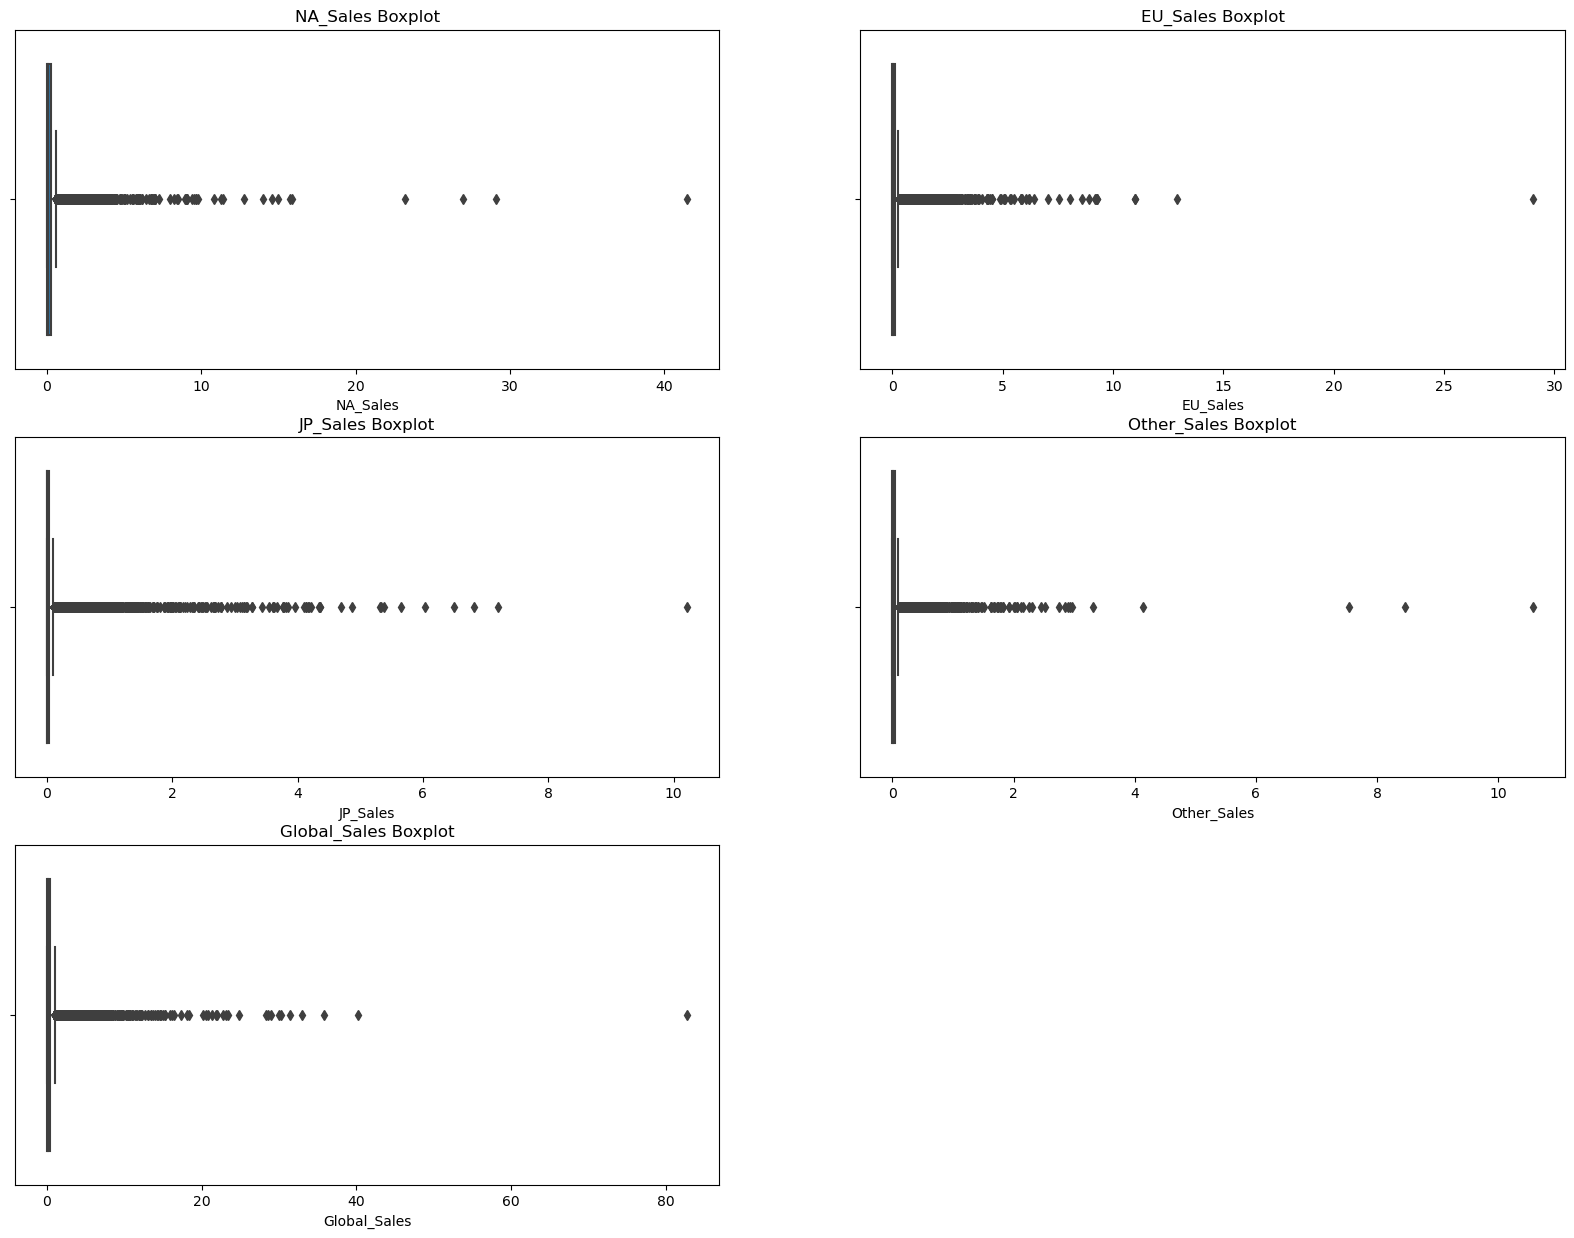

In [60]:
# Visualize outliers

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
plt.figure(figsize=(20, 15))
for i, column in enumerate(sales_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column], orient='v')
    plt.title(f'{column} Boxplot')

In [61]:
# Trimming down the outliers to have a more clean dataset

for column in sales_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

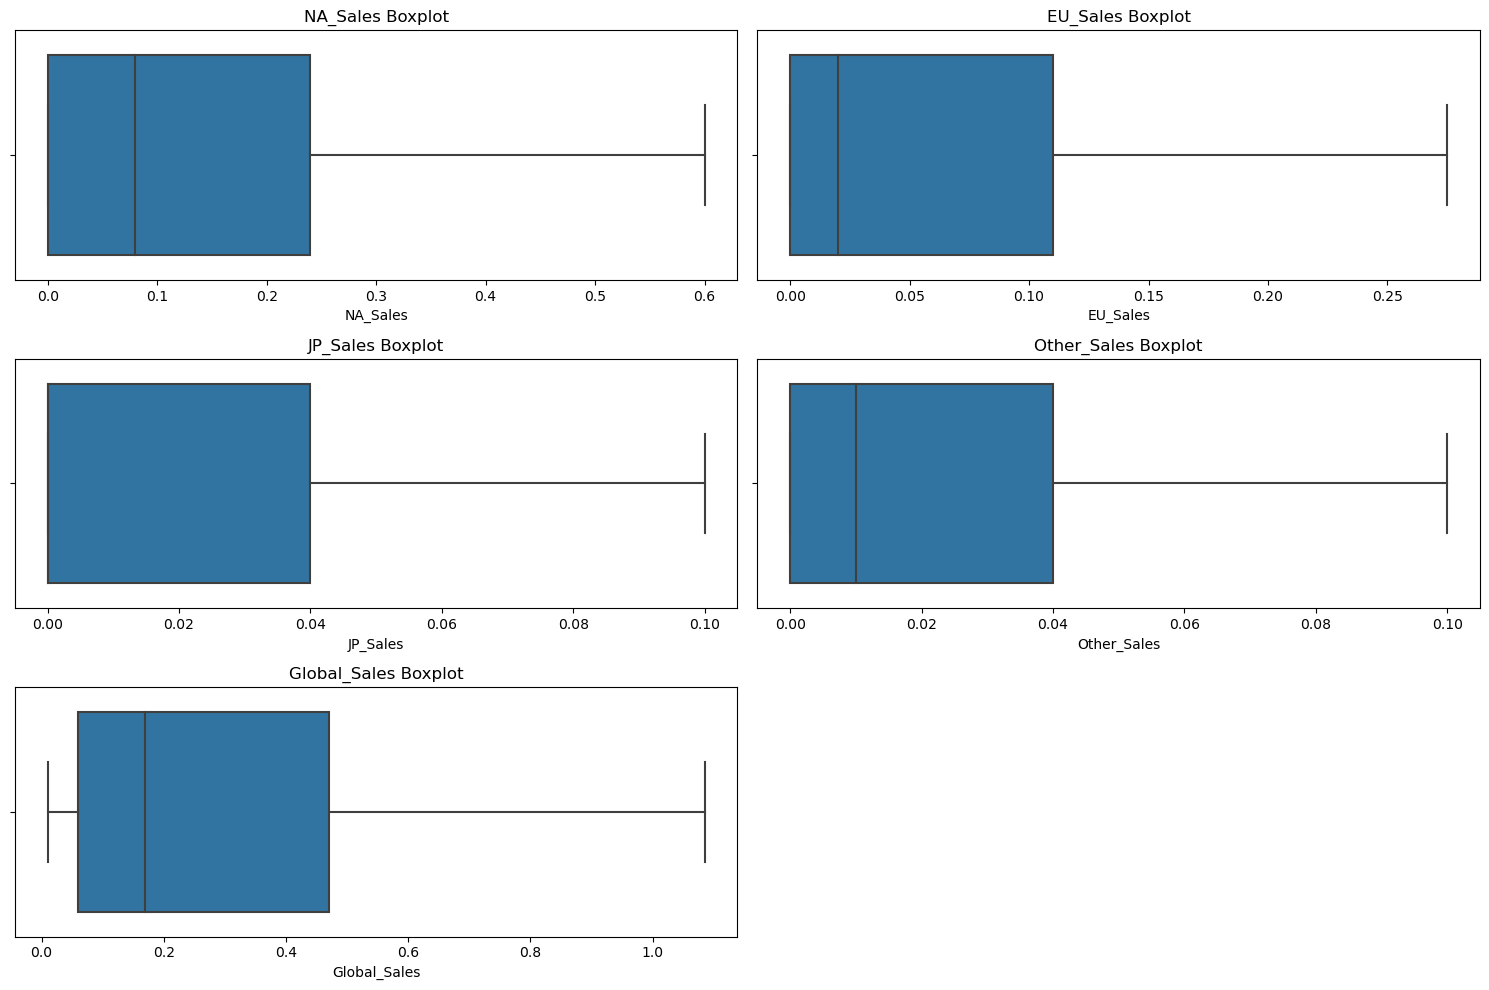

In [62]:
# Visualize outliers again to check if there are still present

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
plt.figure(figsize=(15, 10))
for i, column in enumerate(sales_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'{column} Boxplot')
    
    plt.tight_layout()

In [63]:
numeric_df = df.select_dtypes(include=['number'])

In [64]:
# correlation between the columns

corr_matrix = numeric_df.corr()
print(corr_matrix)

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.177259 -0.798506 -0.734550 -0.238218    -0.764625   
Year          0.177259  1.000000 -0.127724 -0.003594 -0.122498     0.074803   
NA_Sales     -0.798506 -0.127724  1.000000  0.706698 -0.011368     0.758732   
EU_Sales     -0.734550 -0.003594  0.706698  1.000000  0.011690     0.842957   
JP_Sales     -0.238218 -0.122498 -0.011368  0.011690  1.000000     0.049137   
Other_Sales  -0.764625  0.074803  0.758732  0.842957  0.049137     1.000000   
Global_Sales -0.894865 -0.147588  0.877403  0.809262  0.232470     0.841219   

              Global_Sales  
Rank             -0.894865  
Year             -0.147588  
NA_Sales          0.877403  
EU_Sales          0.809262  
JP_Sales          0.232470  
Other_Sales       0.841219  
Global_Sales      1.000000  


<IPython.core.display.Javascript object>

<Axes: >

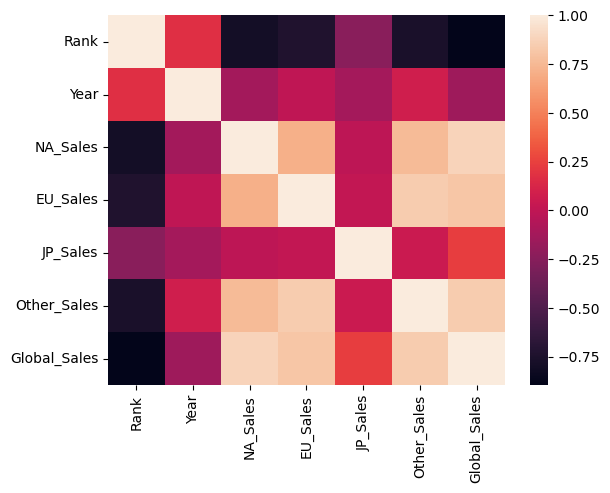

In [65]:
# correlation heatmap

sns.heatmap(corr_matrix)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

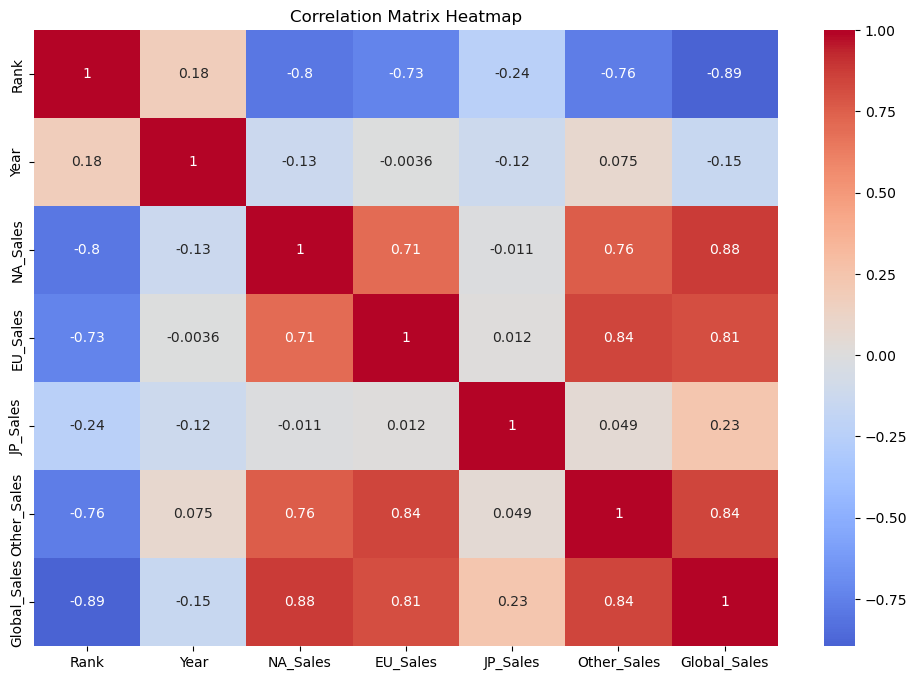

In [66]:
# correlation heatmap

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')

<IPython.core.display.Javascript object>

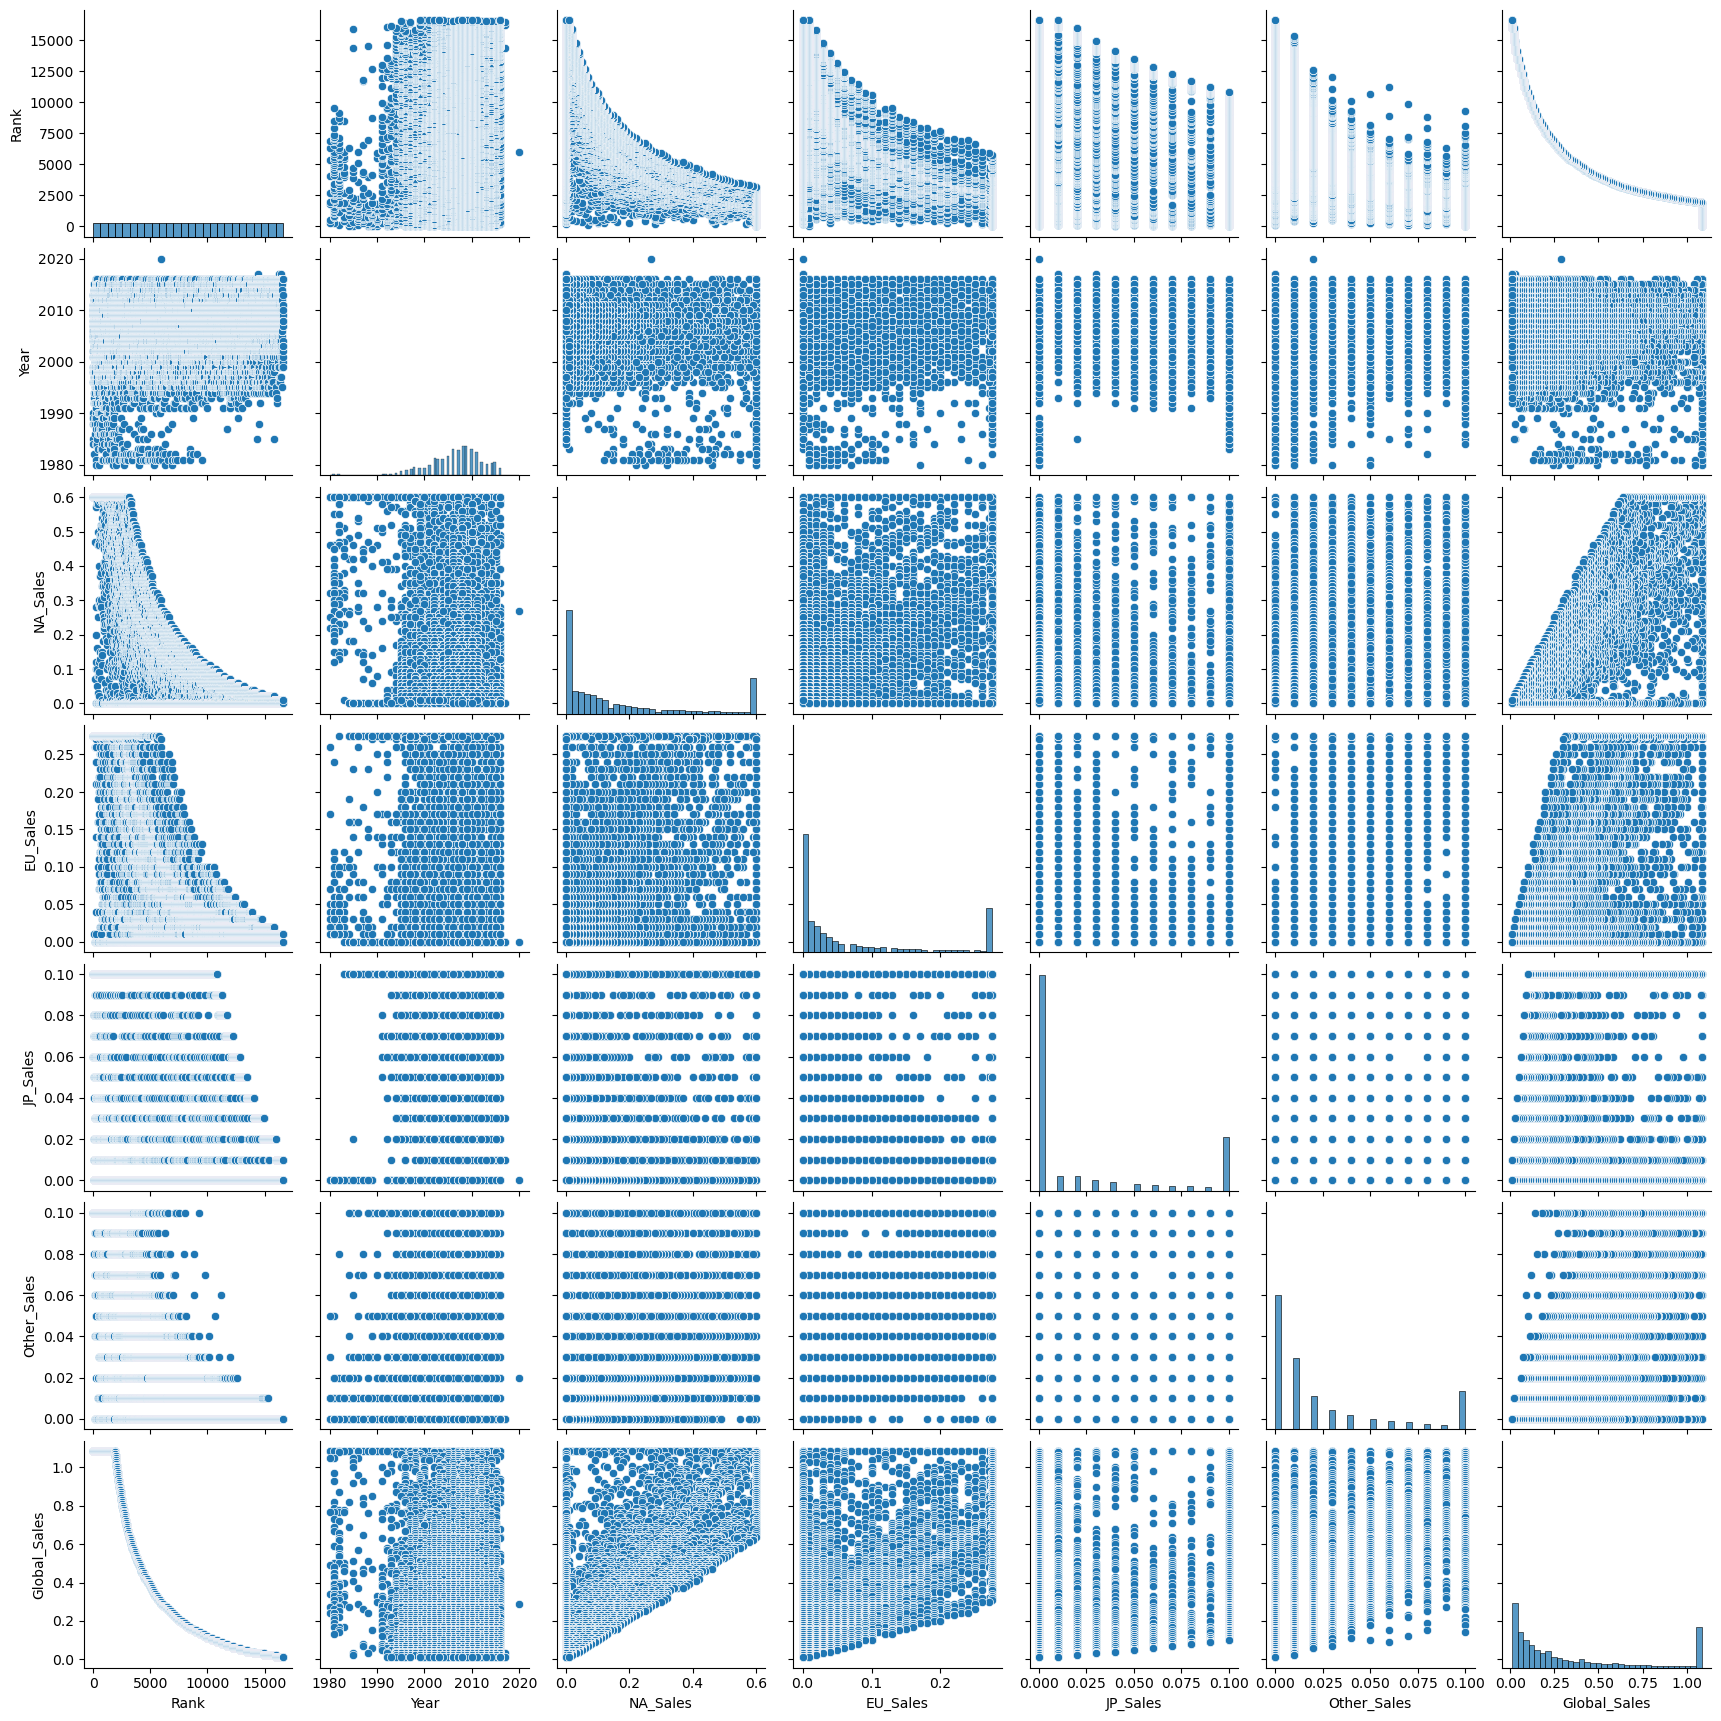

In [67]:
sns.pairplot(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

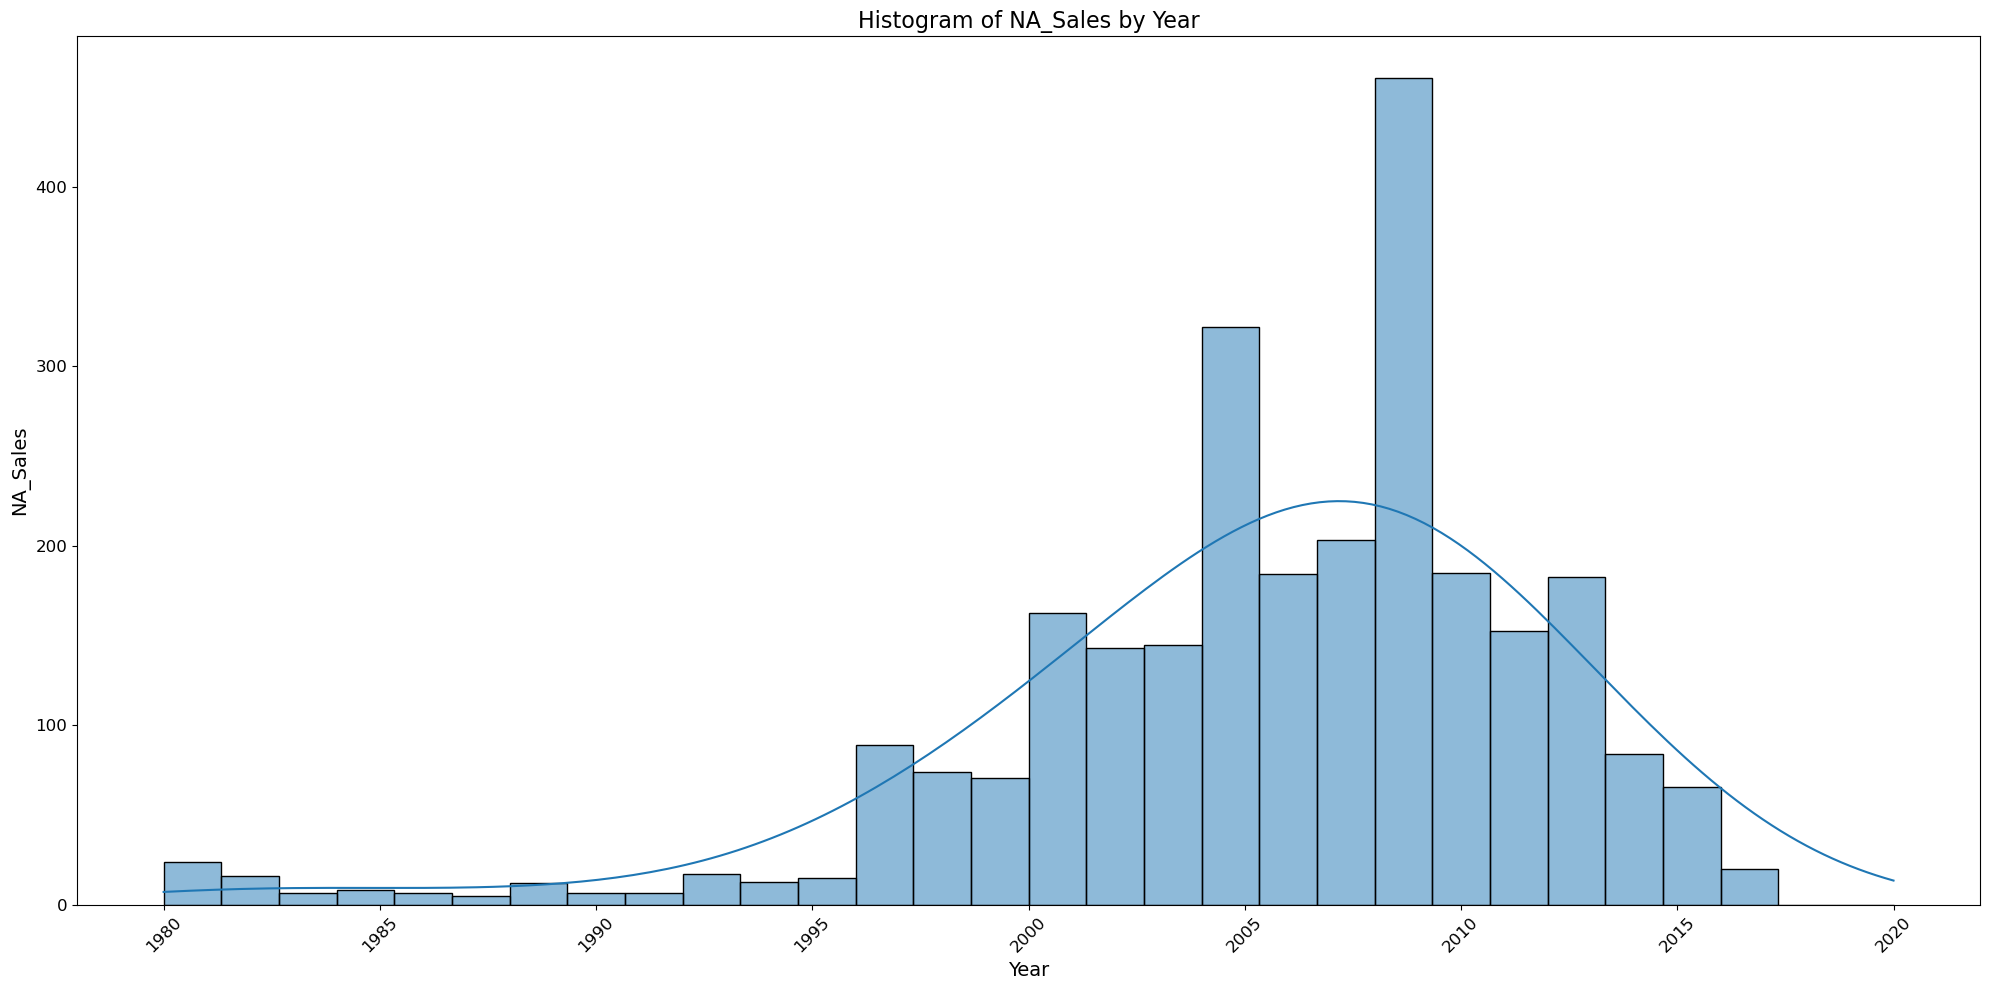

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

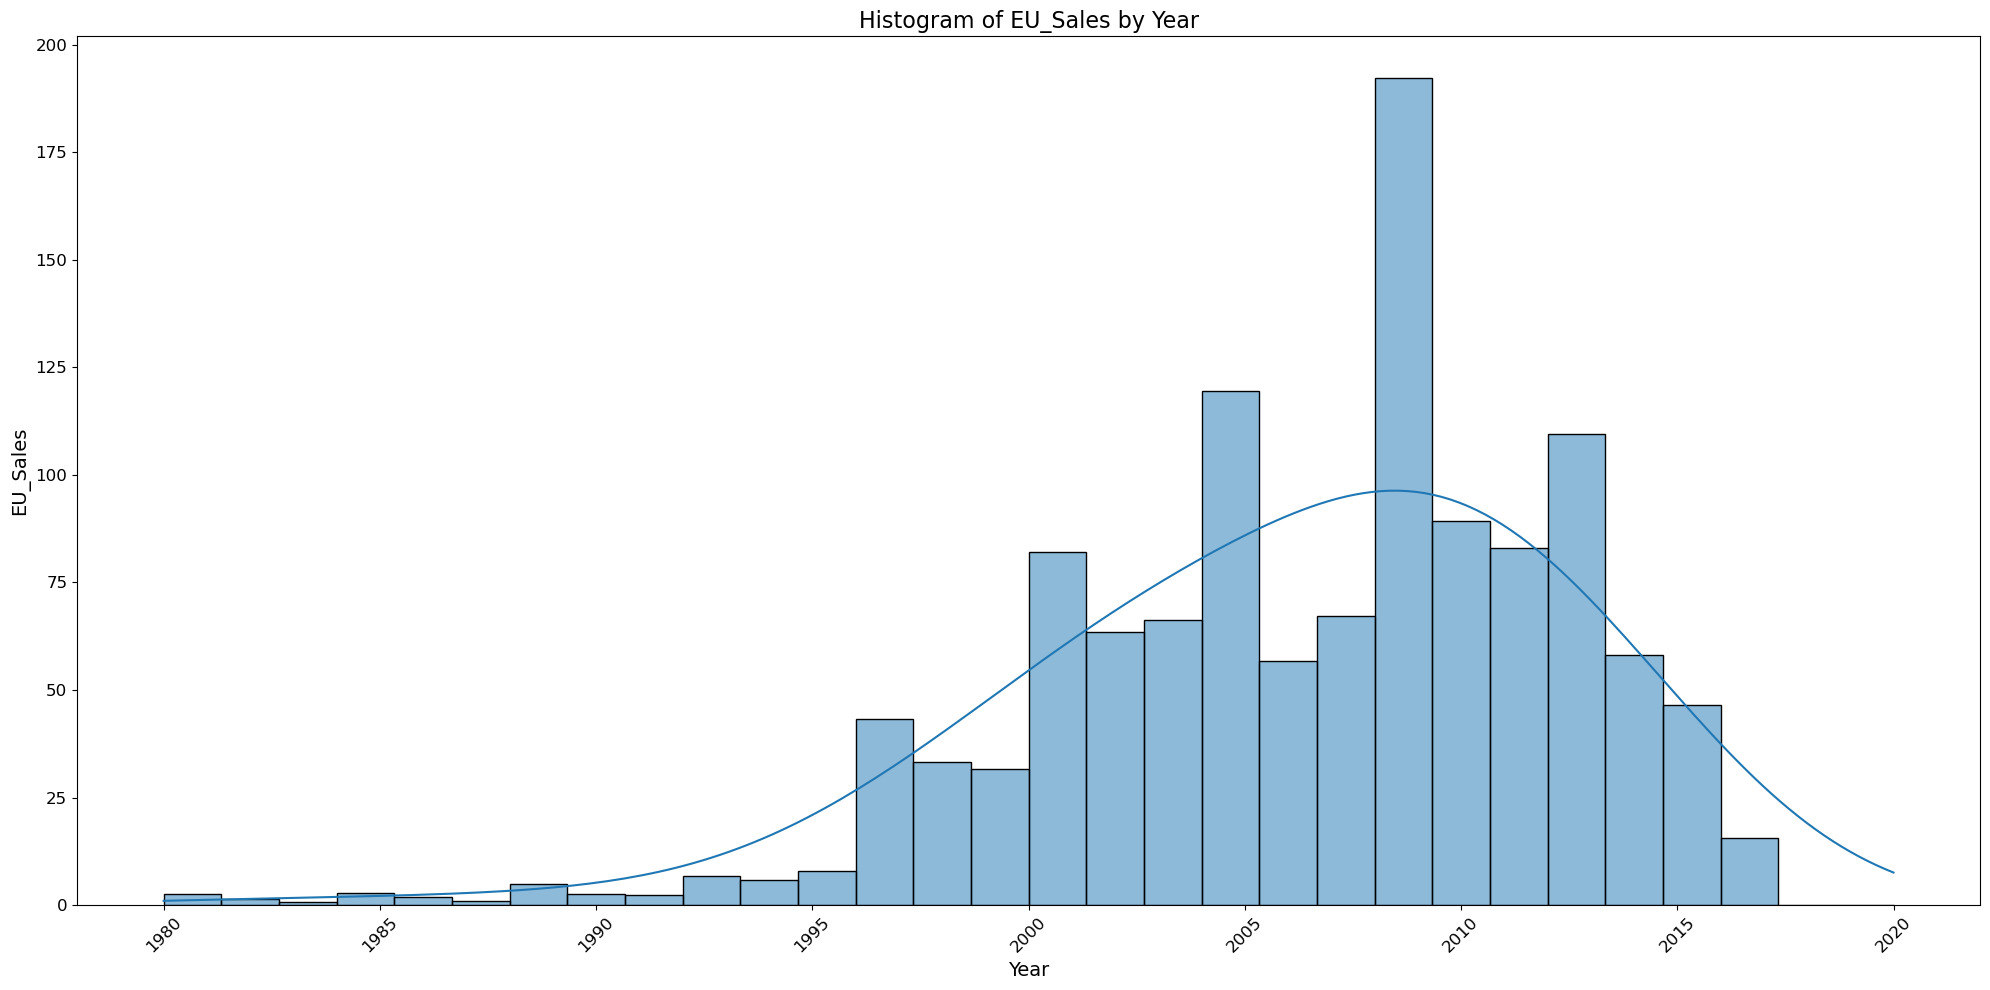

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

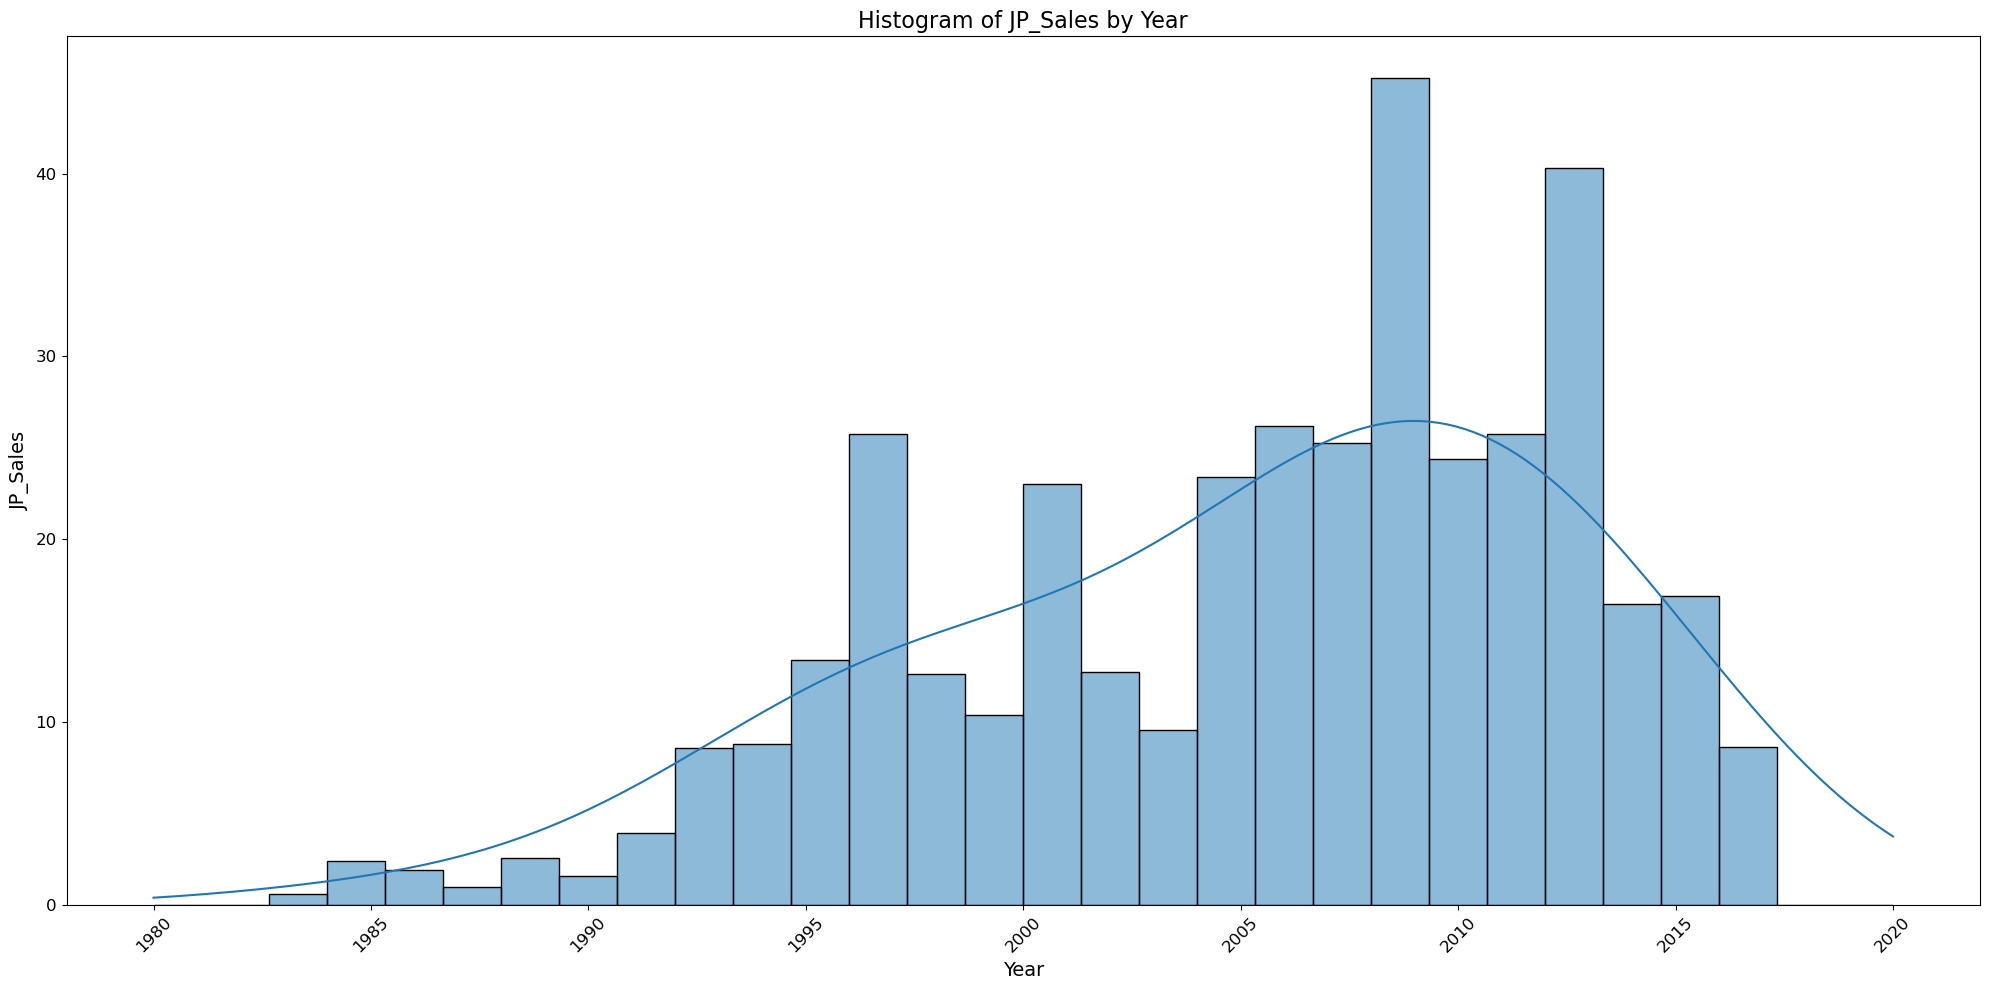

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

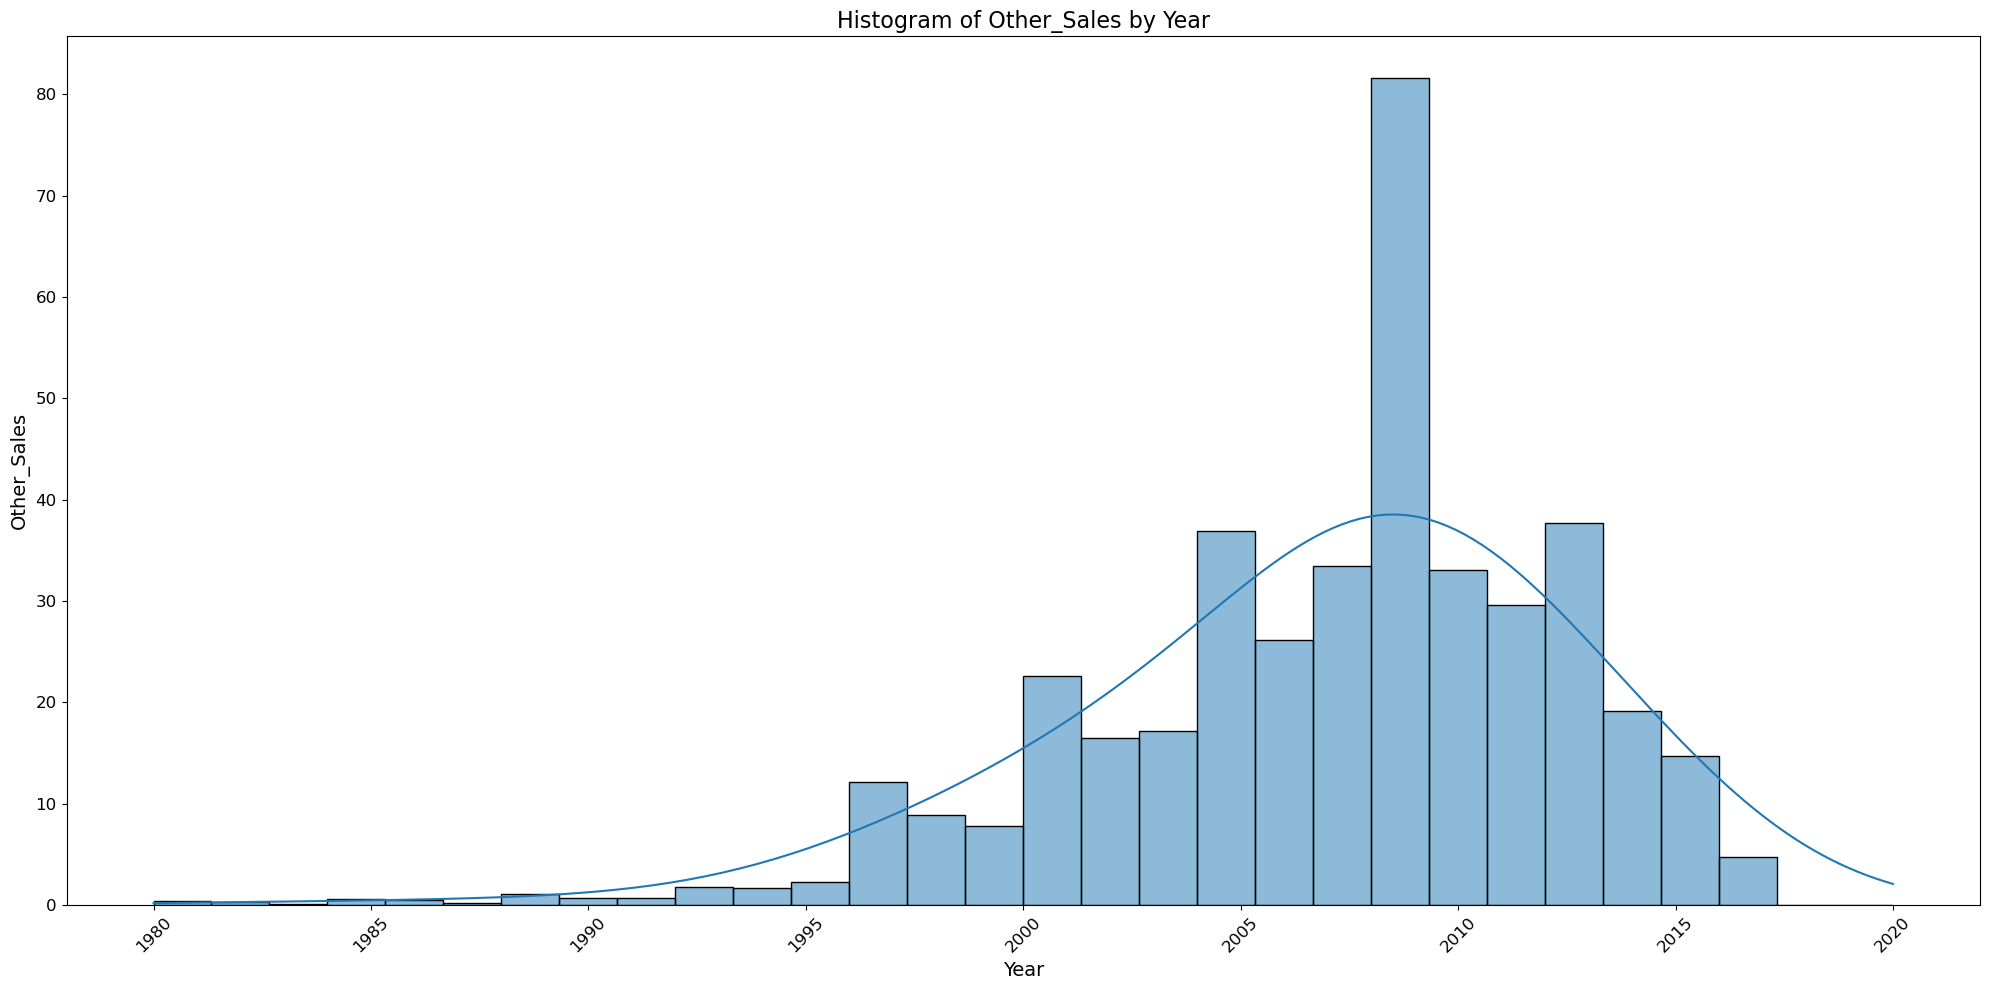

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

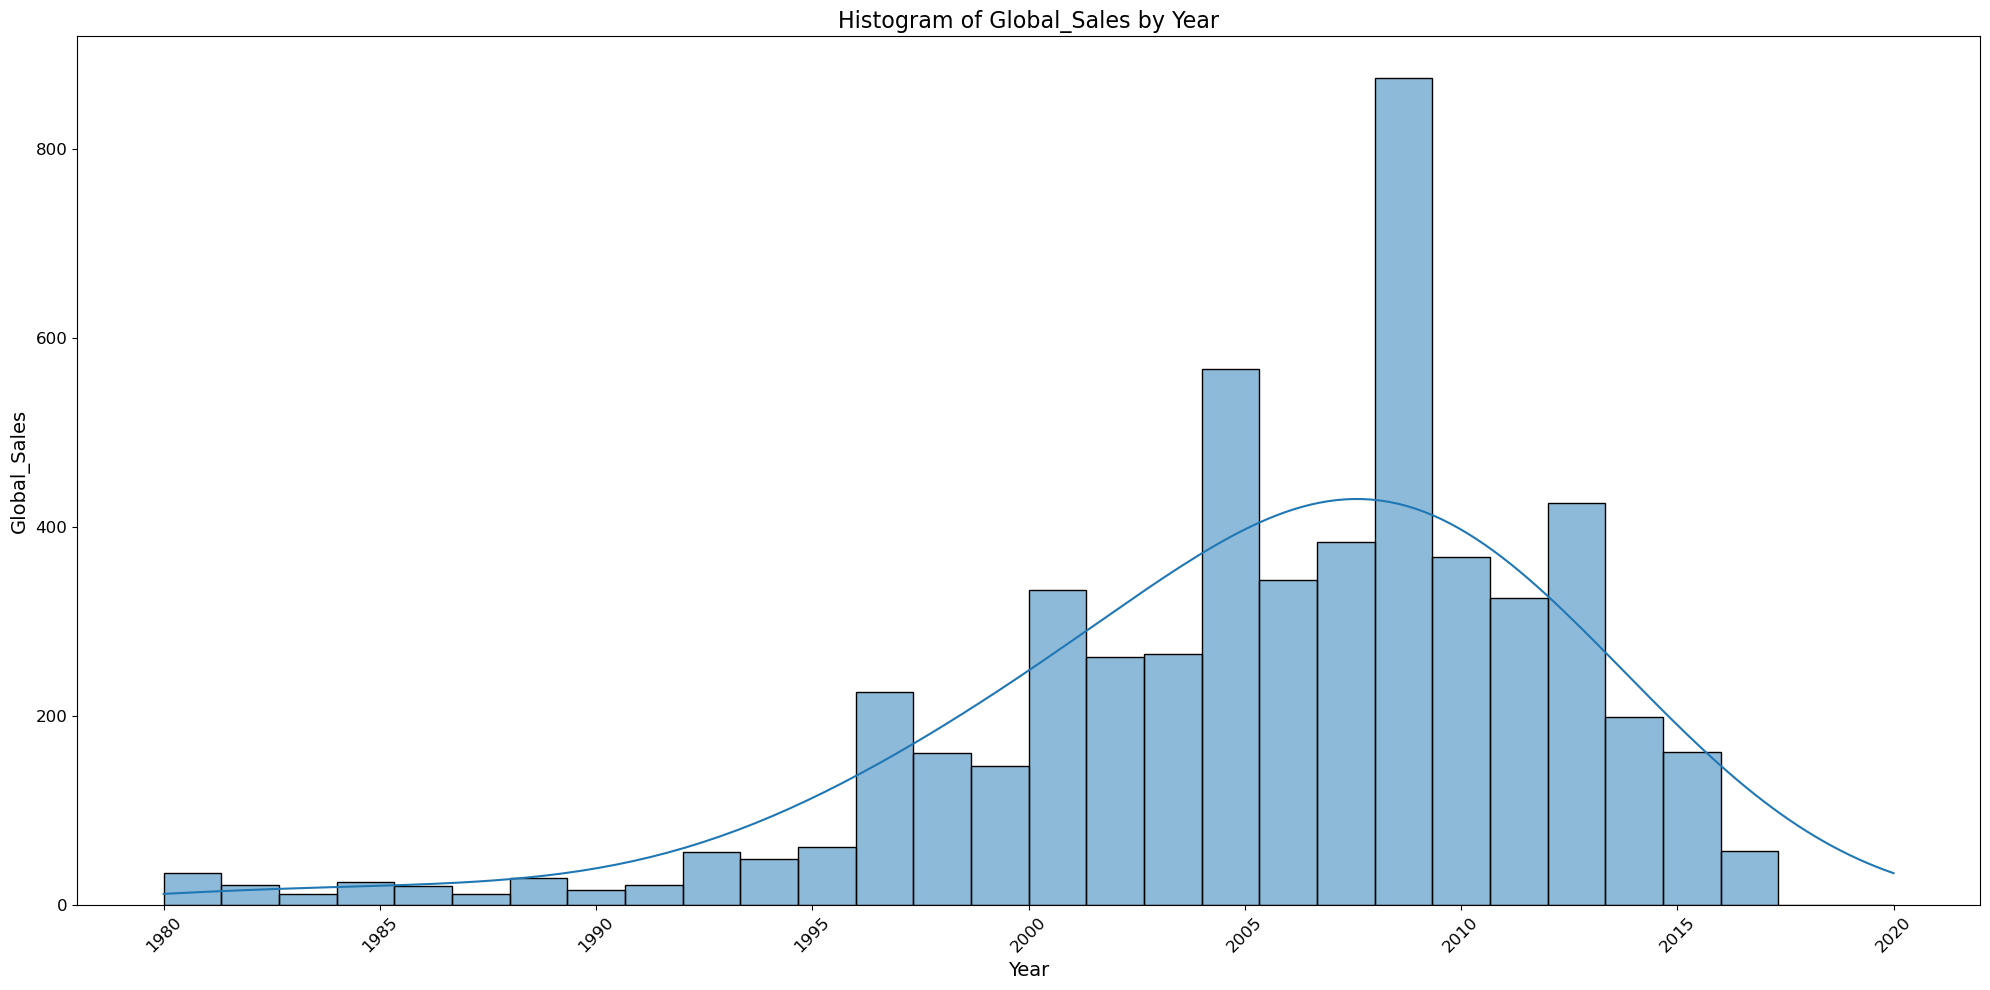

In [68]:
# Histogram plot showing the relationship between Year and Sales

# List of sales columns
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Plotting histograms for each sales column
for sales_col in sales_columns:
    plt.figure(figsize=(20, 10))  # Increase the figsize to (20, 10)
    
    # Grouping sales by Year
    yearly_sales = df.groupby('Year')[sales_col].sum().reset_index()
    
    # Plotting the histogram
    sns.histplot(data=yearly_sales, x='Year', weights=sales_col, bins=30, kde=True)
    plt.title(f'Histogram of {sales_col} by Year', fontsize=16)  # Increase title font size
    plt.xlabel('Year', fontsize=14)  # Increase x-axis label font size
    plt.ylabel(sales_col, fontsize=14)  # Increase y-axis label font size
    plt.xticks(rotation=45, fontsize=12)  # Rotate and adjust font size of x-axis labels
    plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
    
    plt.tight_layout()
    plt.show()

In [69]:
# importing libraries for standardization of my data

from sklearn.preprocessing import StandardScaler

In [70]:
# Standardizing the sales columns in my data, mean=1, standard deviation=1

scaler = MinMaxScaler()
df[sales_columns] = scaler.fit_transform(df[sales_columns])

<IPython.core.display.Javascript object>

In [71]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.399807      0.269477      0.262552      0.235908   
std     4791.853933      5.781426      0.329447      0.350728      0.377064   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.133333      0.072727      0.000000   
75%    12449.750000   2010.000000      0.400000      0.400000      0.400000   
max    16600.000000   2020.000000      1.000000      1.000000      1.000000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.248566      0.296576  
std        0.332561      0.329806  
min        0.000000      0.000000  
25%        0.000000      0.046512  
50%        0.100000      0.148837  
75%        0.400000      0.427907  
max        1.000000      1.000000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

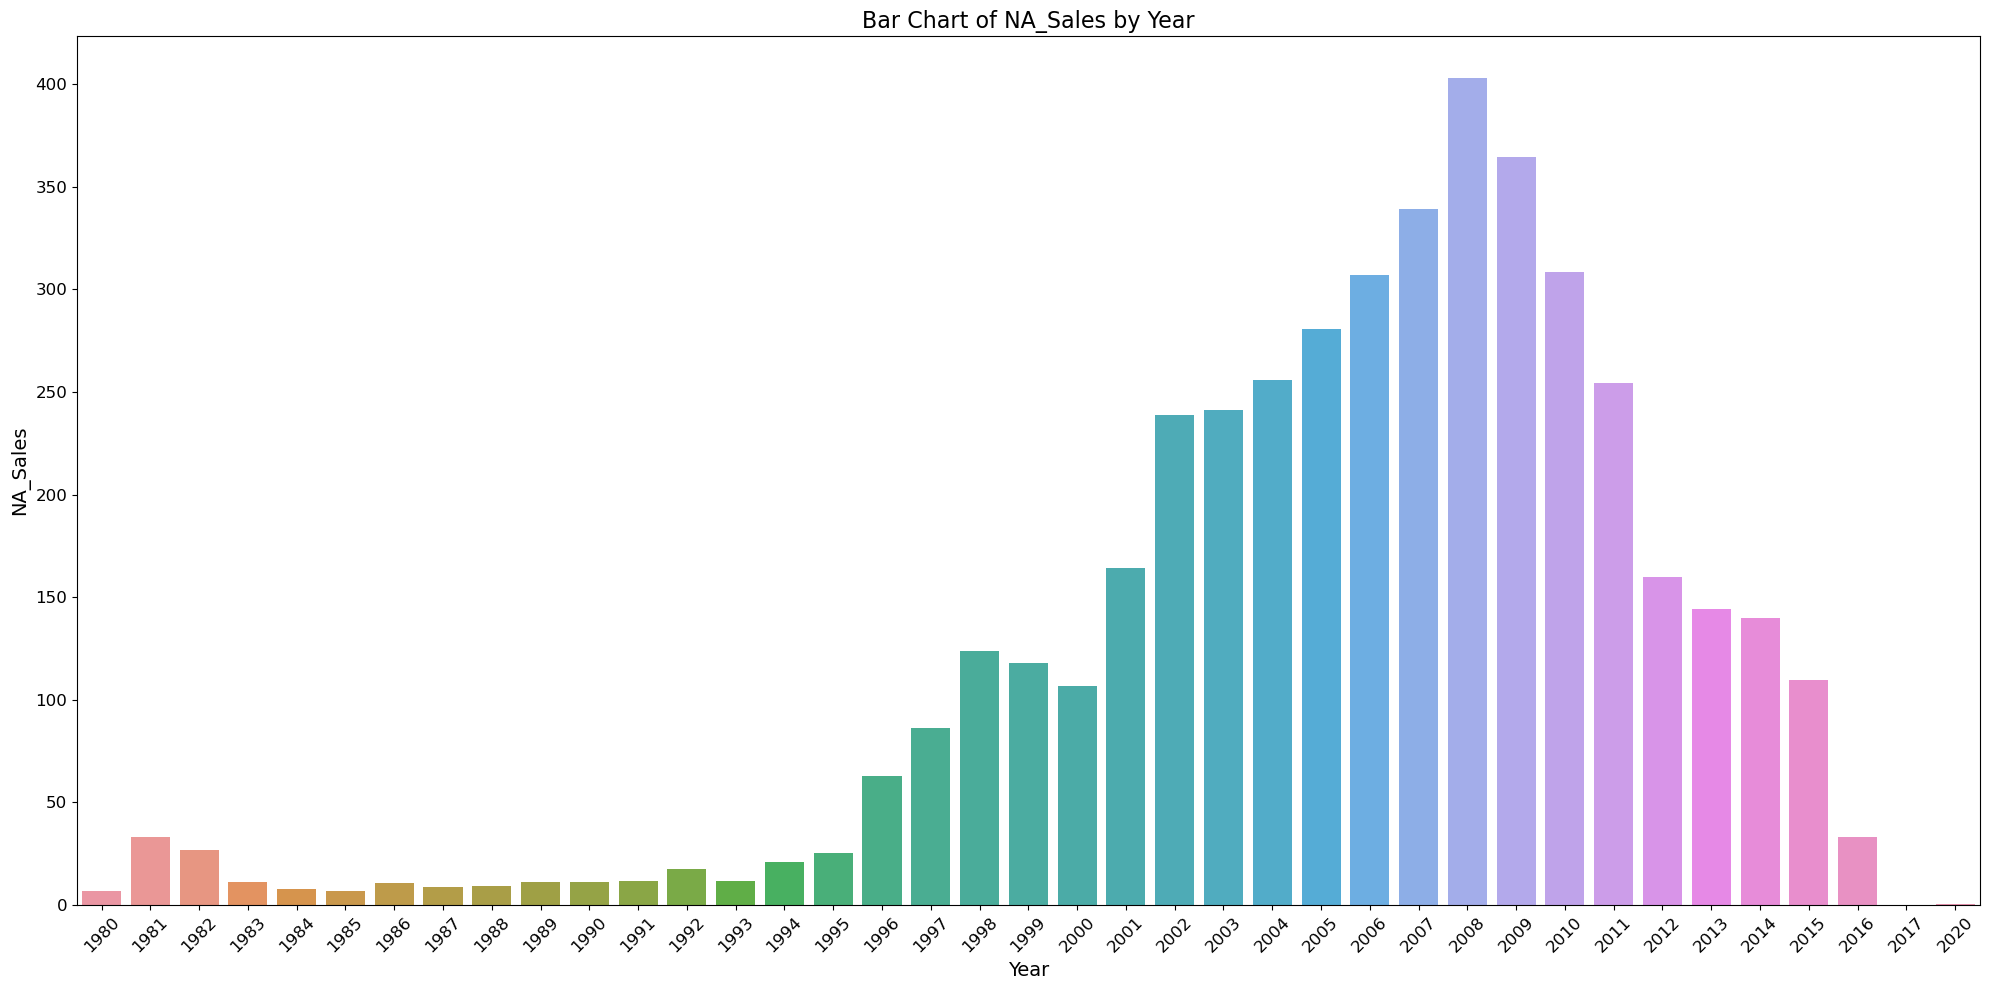

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

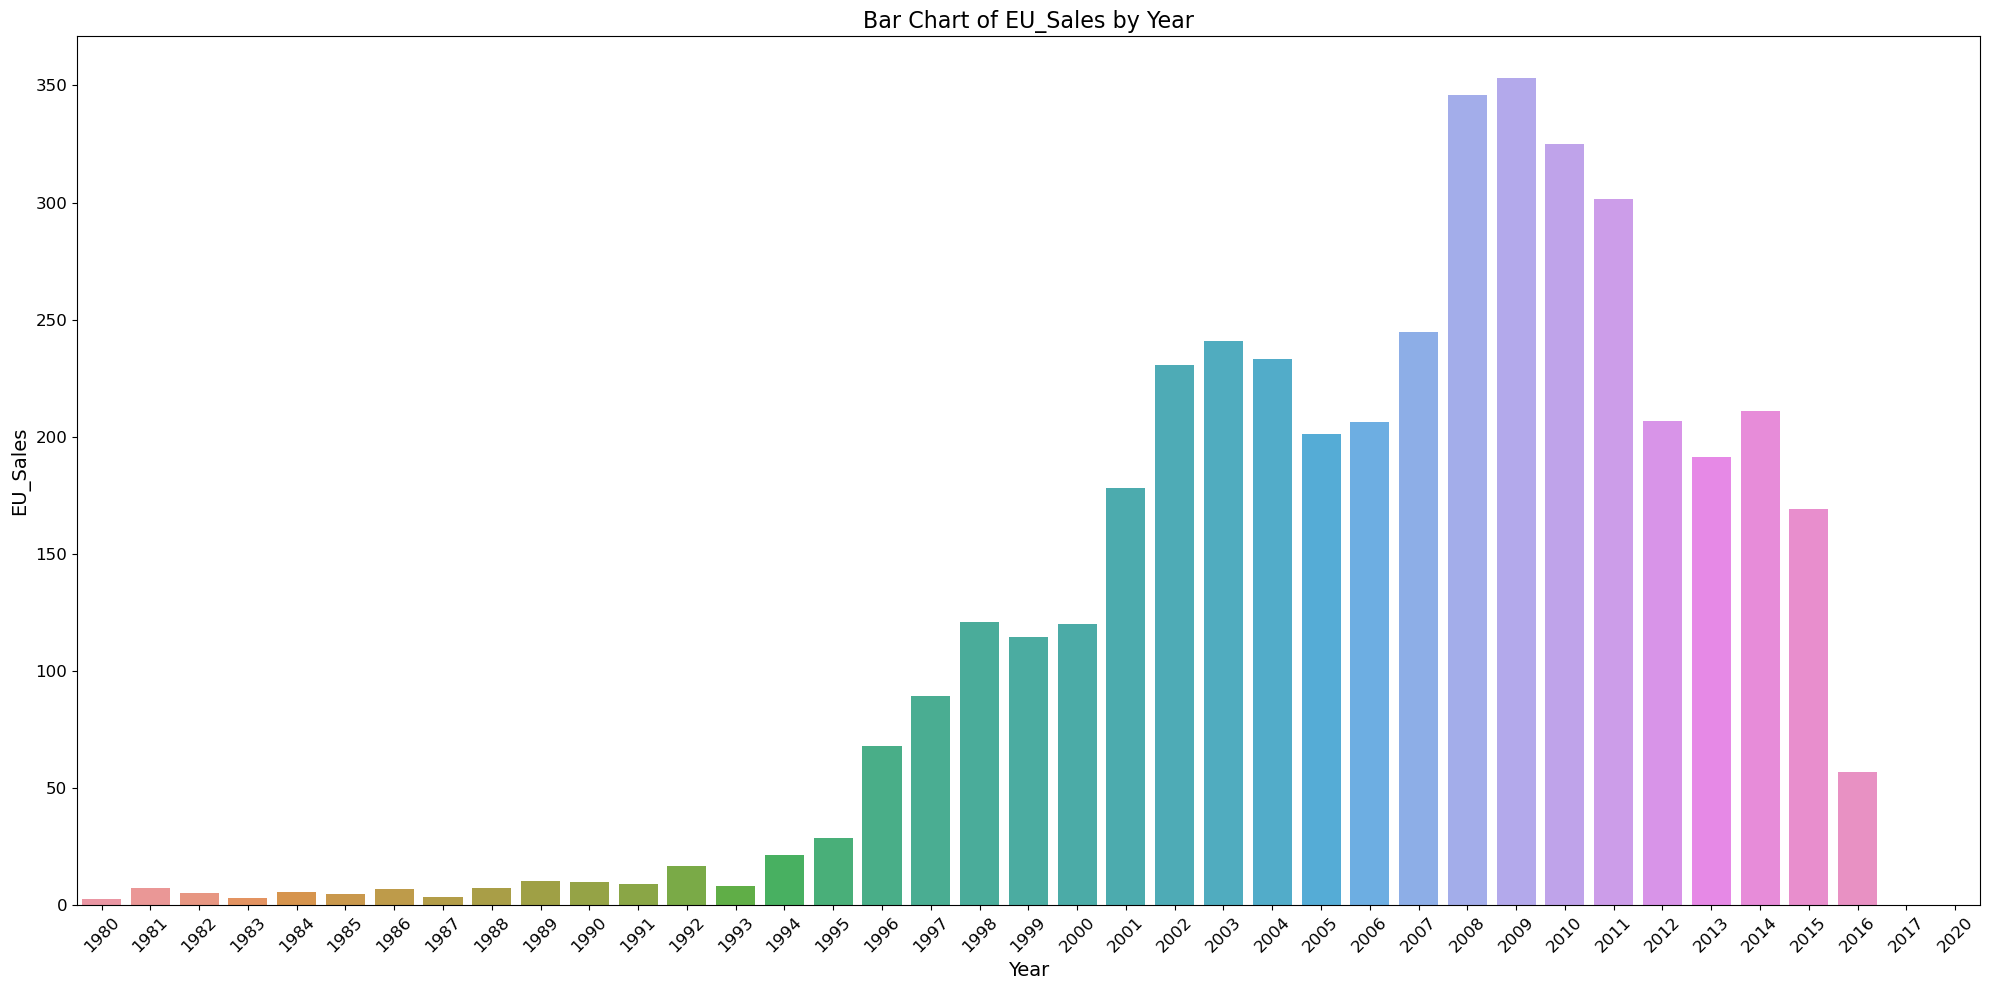

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

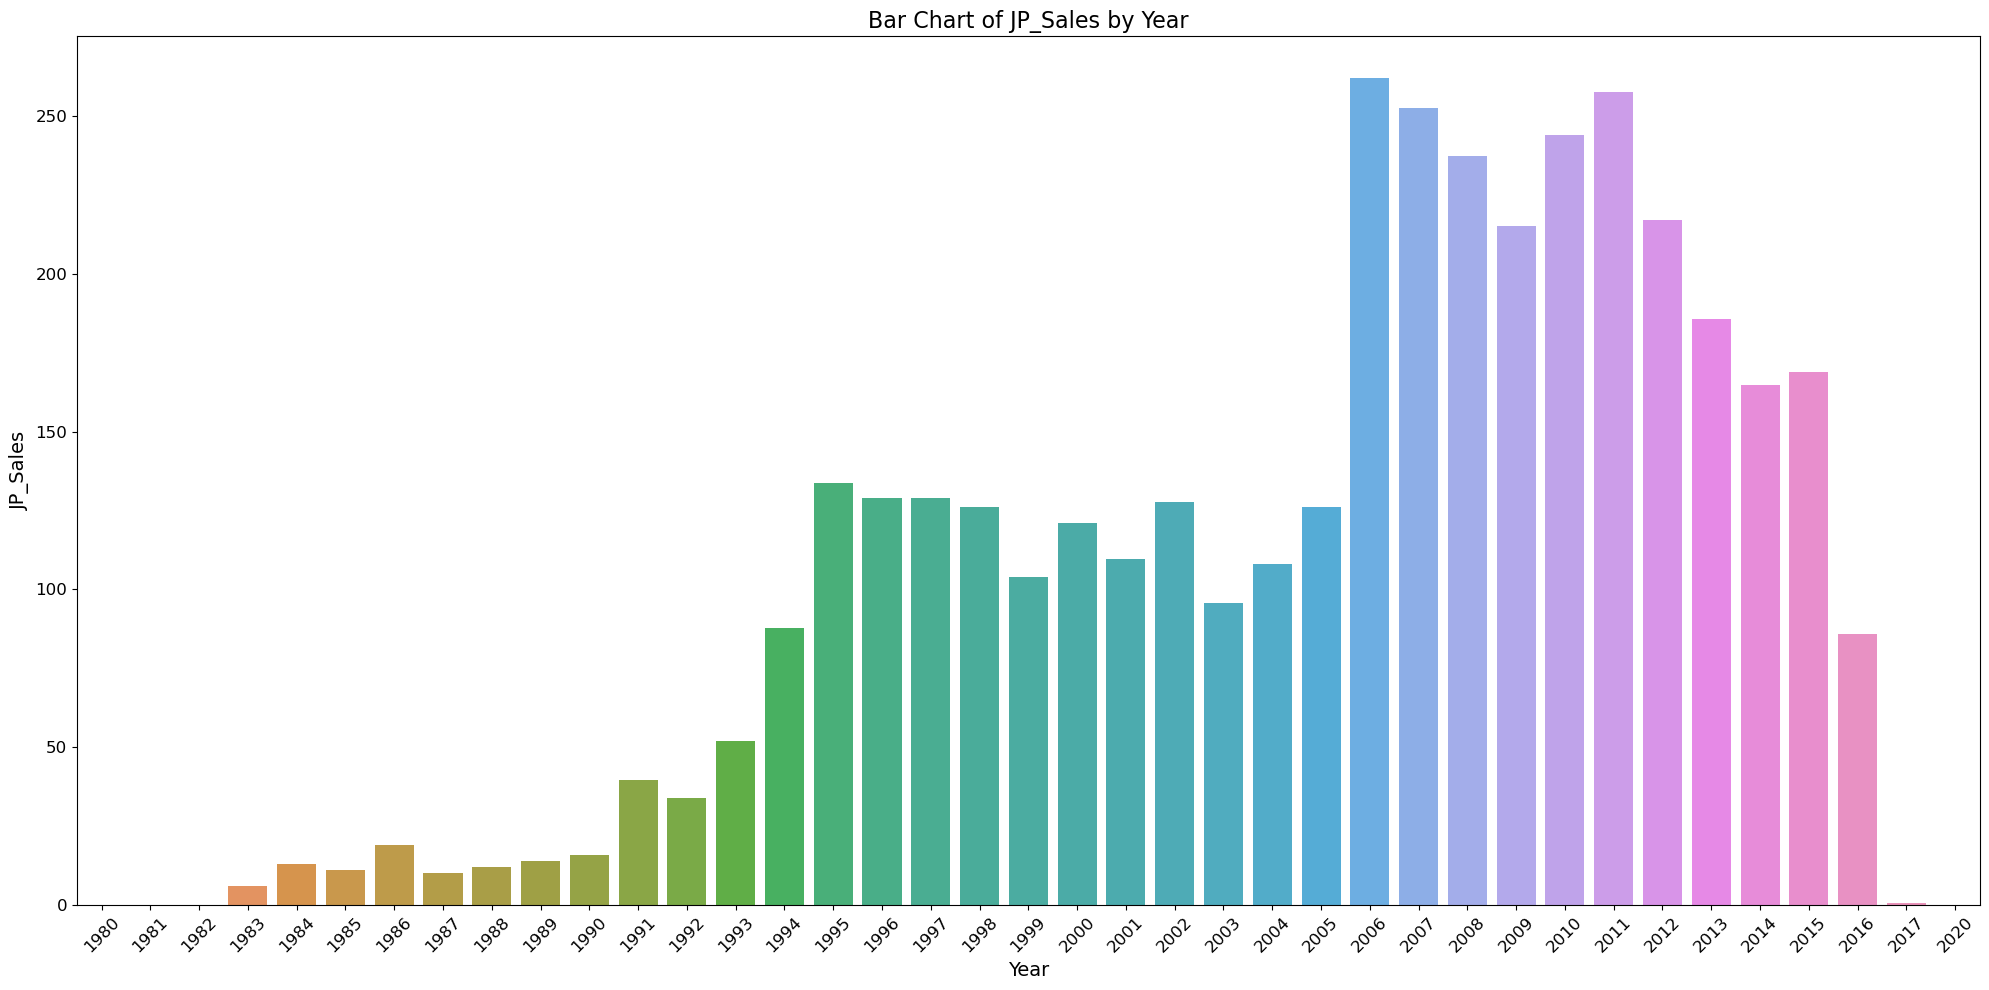

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

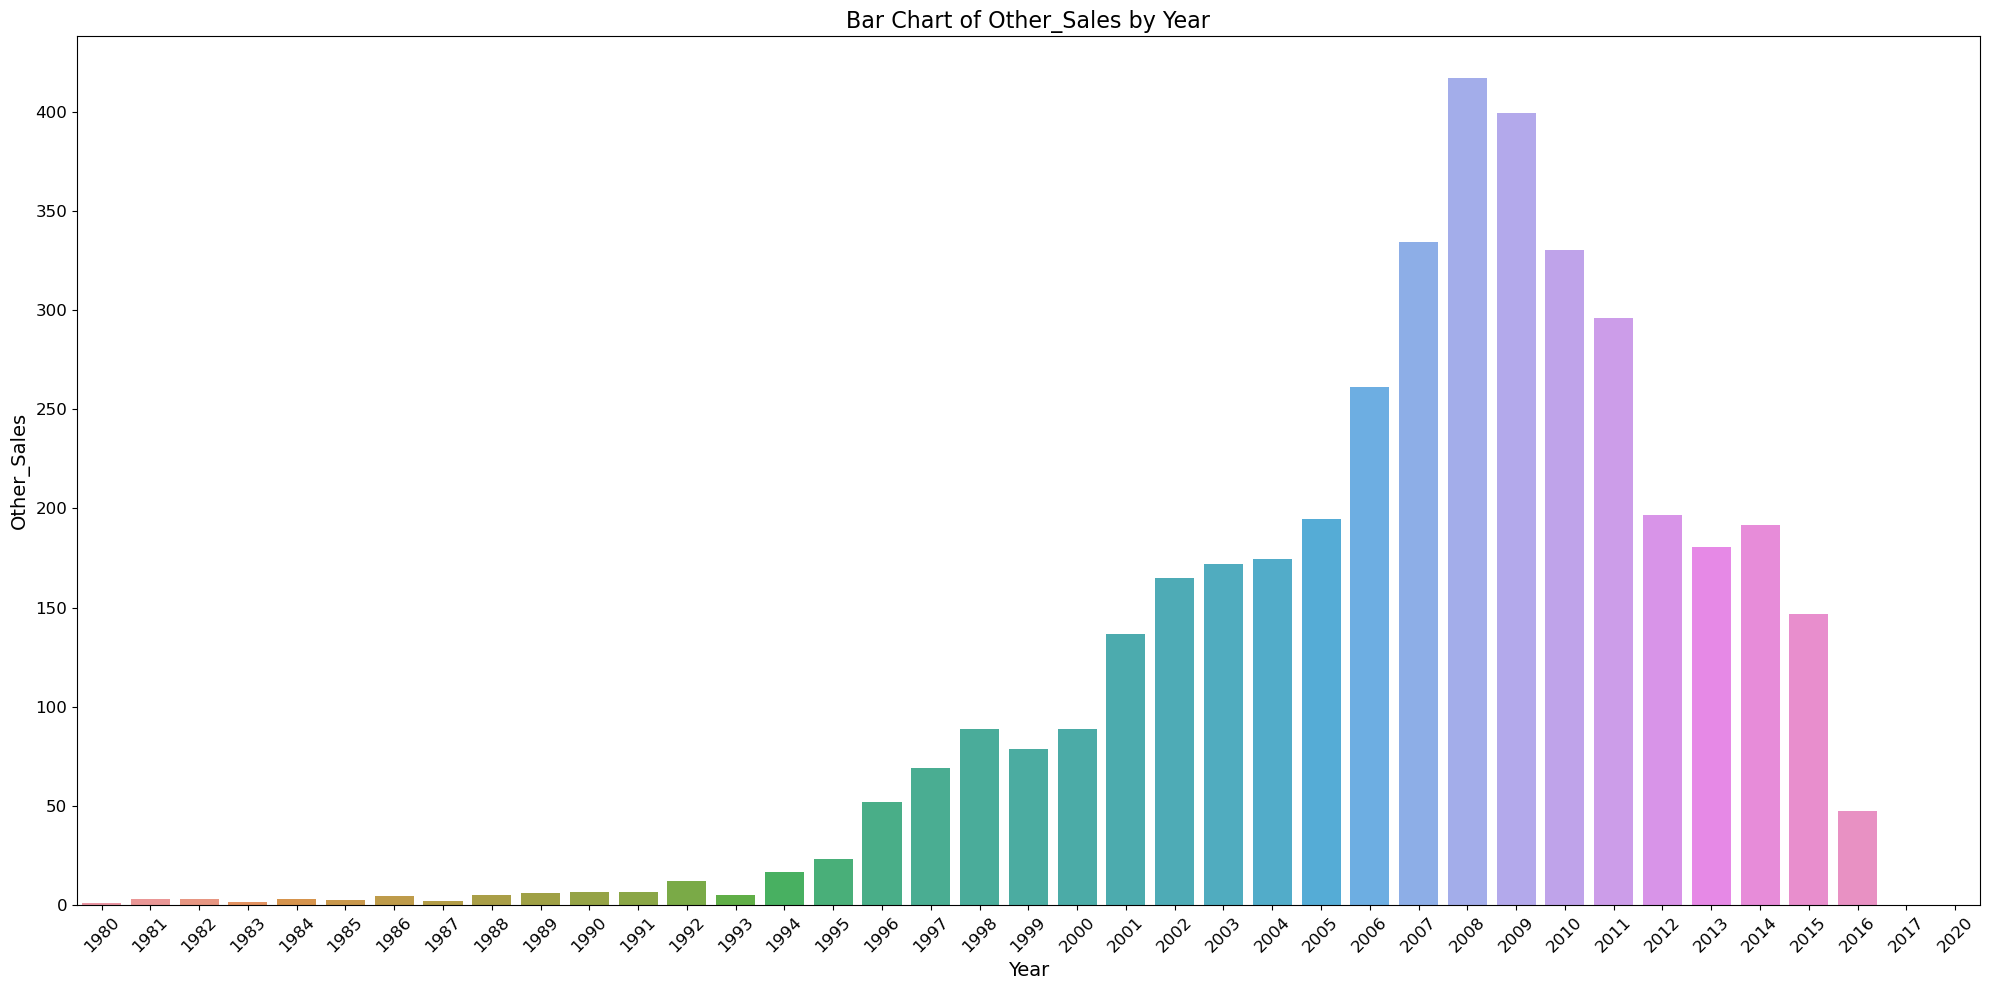

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

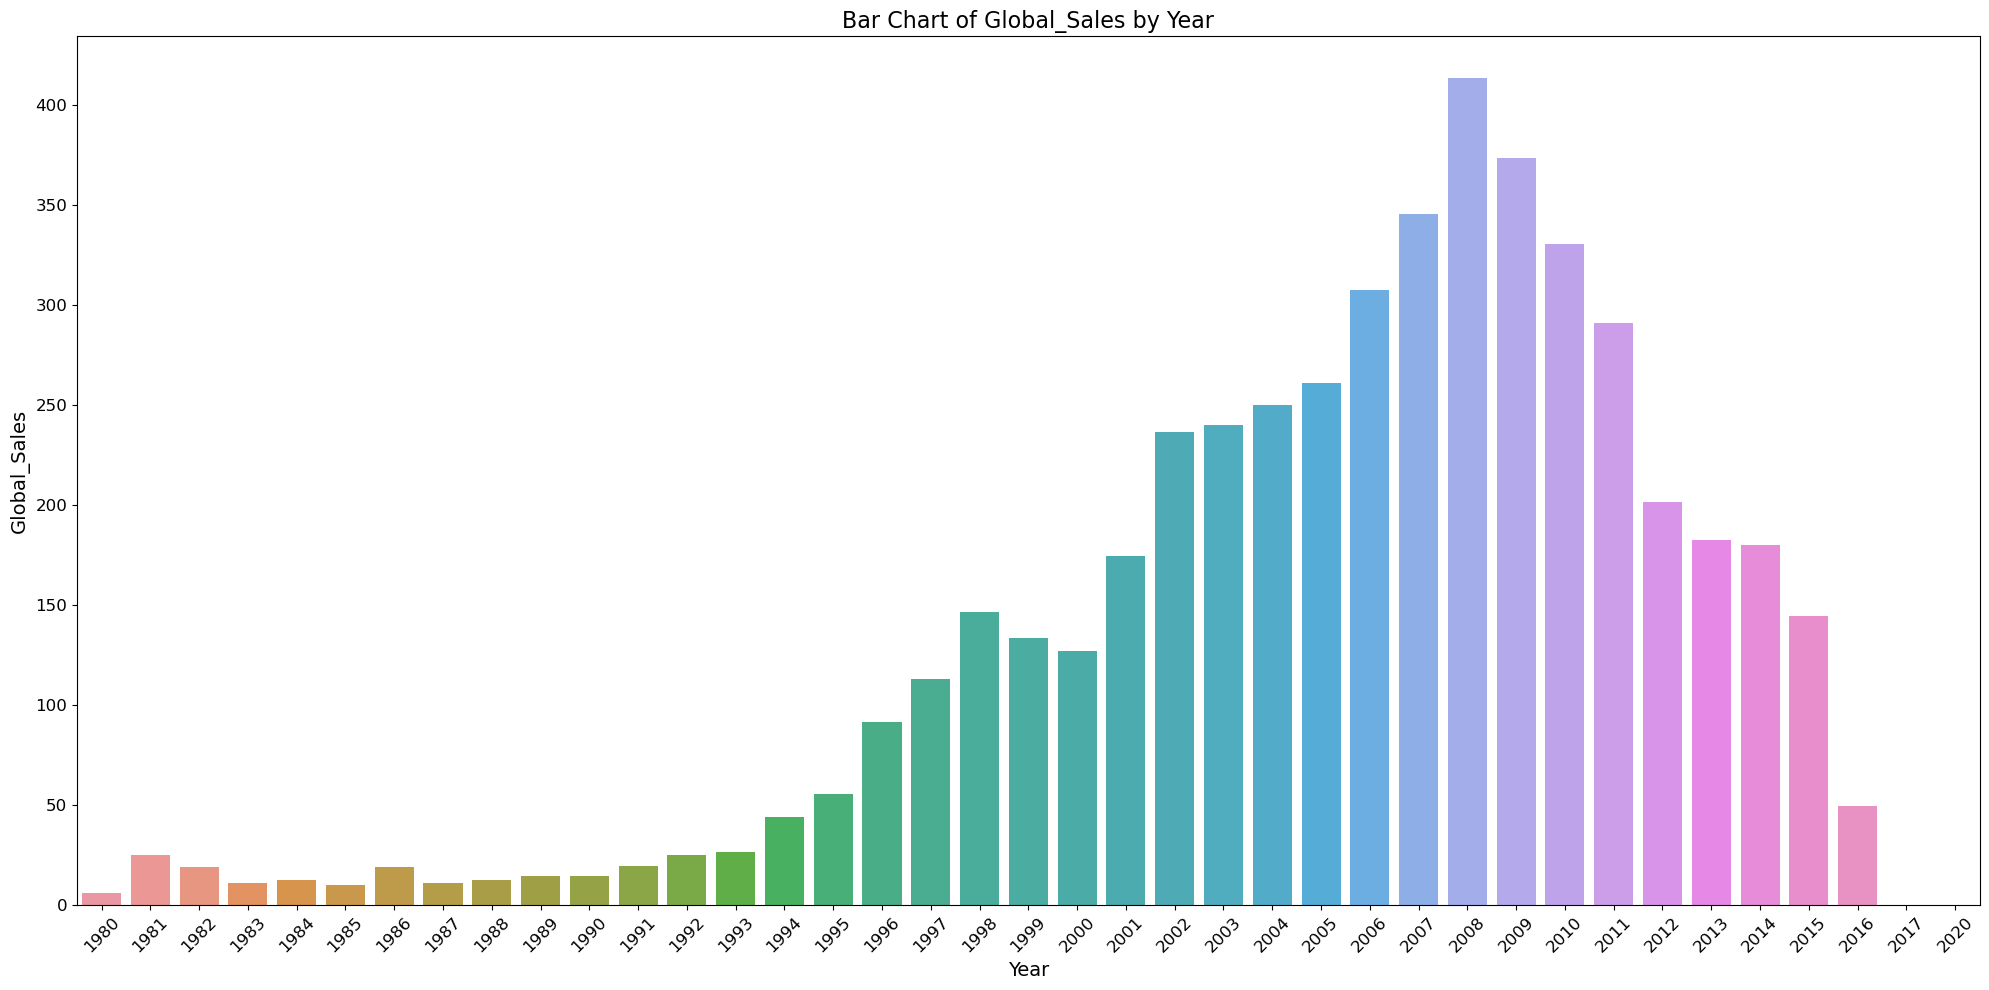

In [72]:
# A barplot showing the relationship between the Year and the trend of sales across each regions and globally

# List of sales columns
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Plotting each sales column separately with larger size
for sales_col in sales_columns:
    plt.figure(figsize=(20, 10))  # Increase the figsize to (20, 10)
    
    # Grouping sales by Year
    yearly_sales = df.groupby('Year')[sales_col].sum().reset_index()
    
    # Plotting the bar chart
    sns.barplot(data=yearly_sales, x='Year', y=sales_col)
    plt.title(f'Bar Chart of {sales_col} by Year', fontsize=16)  # Increase title font size
    plt.xlabel('Year', fontsize=14)  # Increase x-axis label font size
    plt.ylabel(sales_col, fontsize=14)  # Increase y-axis label font size
    plt.xticks(rotation=45, fontsize=12)  # Rotate and adjust font size of x-axis labels
    plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
    
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

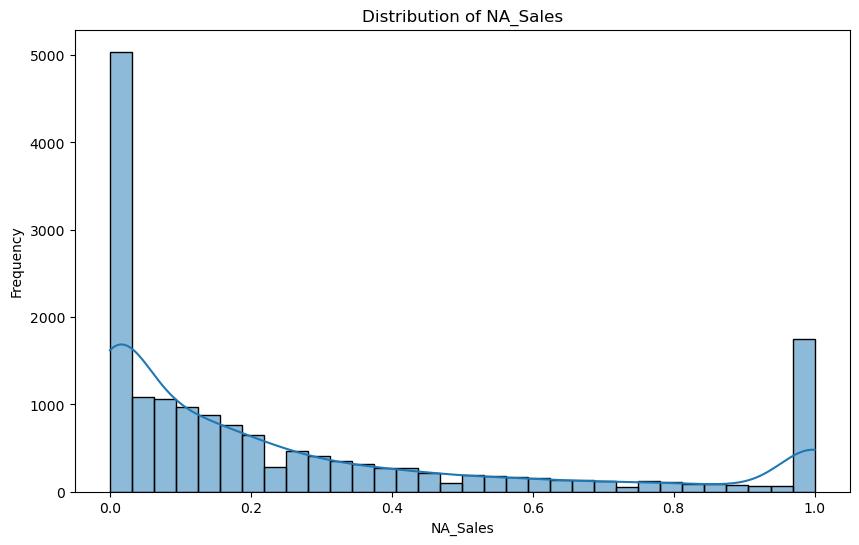

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

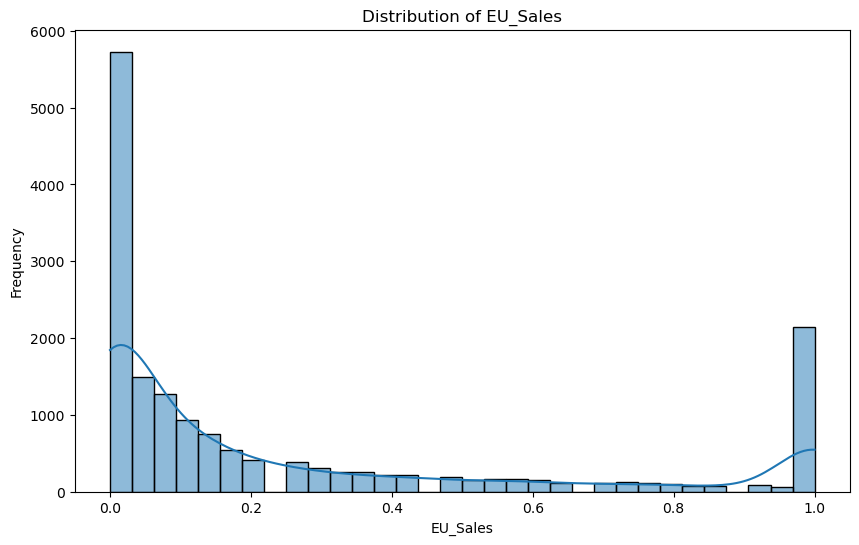

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

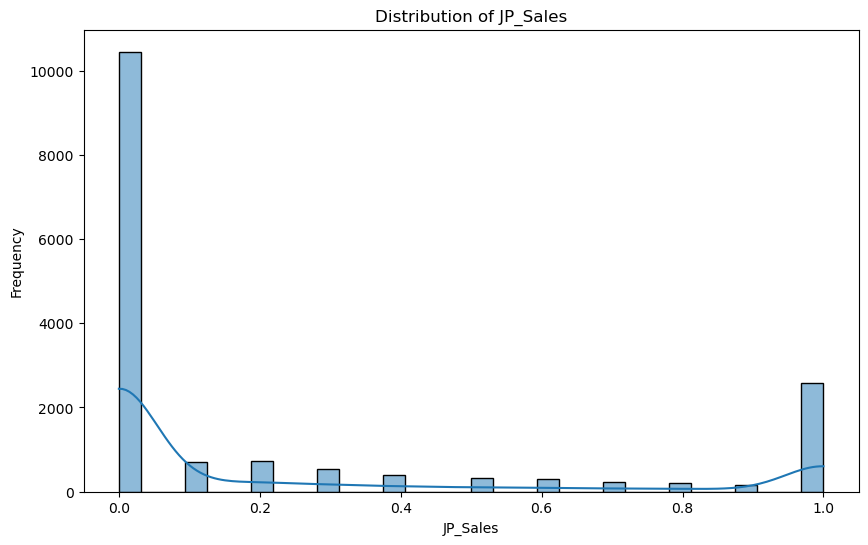

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

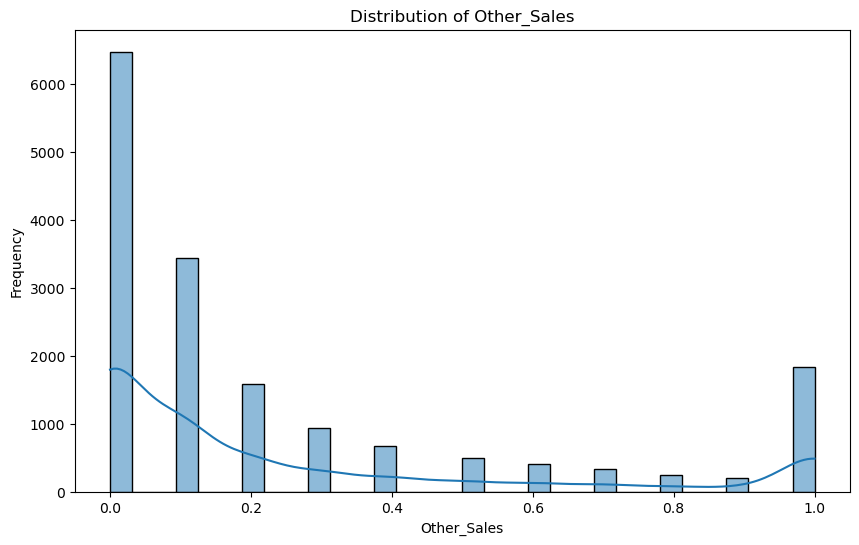

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

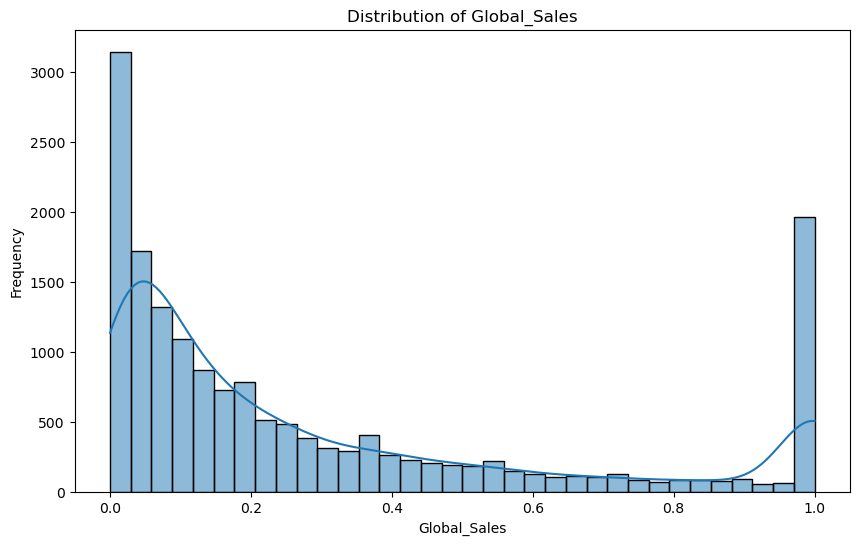

In [73]:
# To see the distribution of sales across different regions and globally.

for sales_col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[sales_col], kde=True)
    plt.title(f'Distribution of {sales_col}')
    plt.xlabel(sales_col)
    plt.ylabel('Frequency')
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

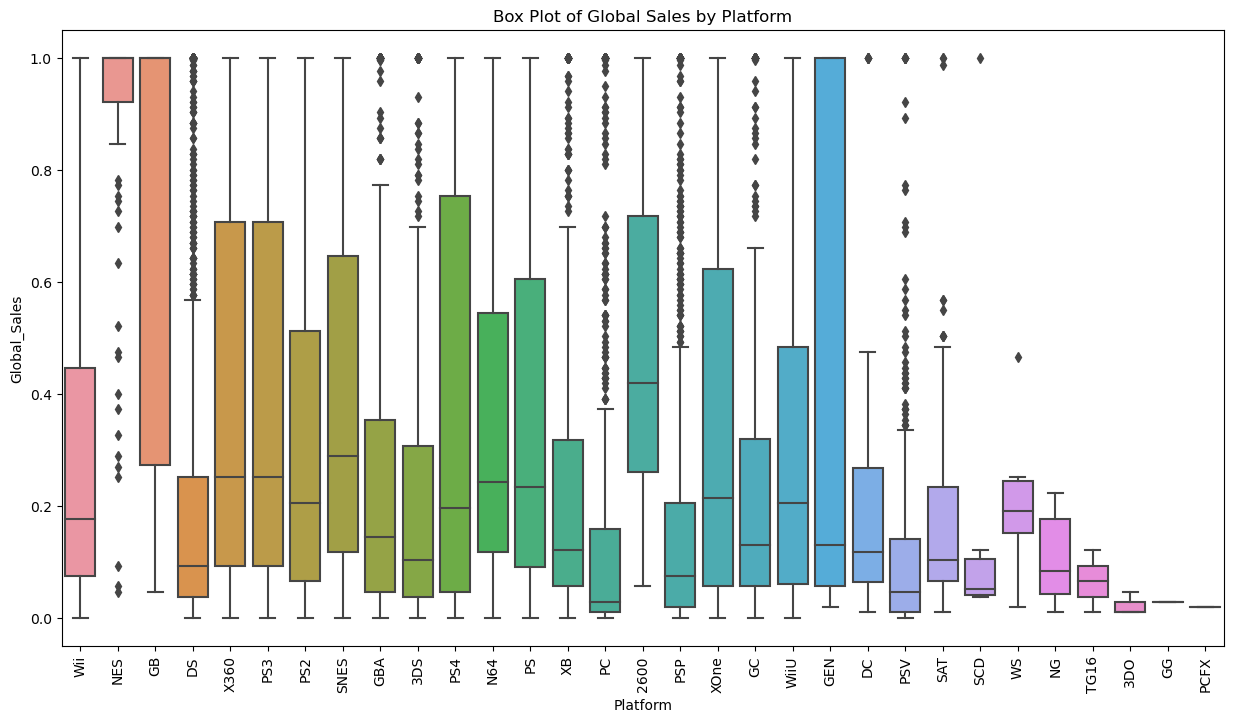

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

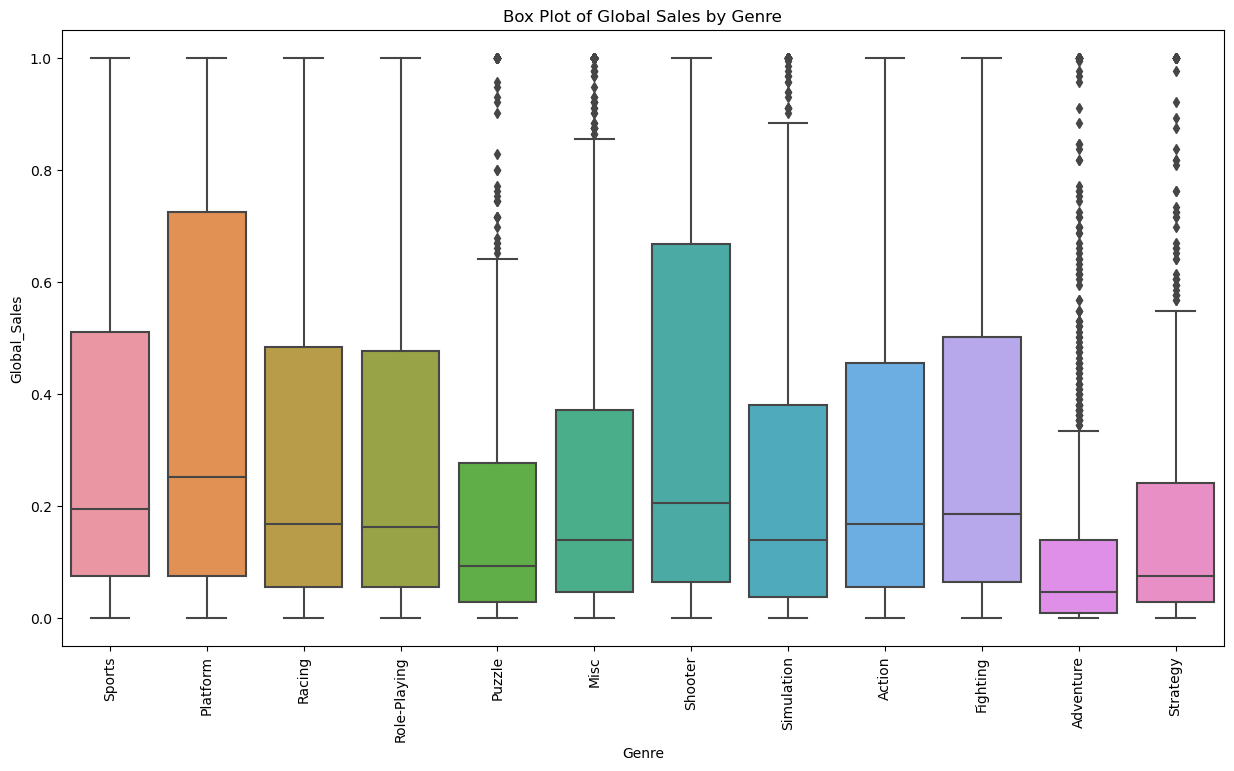

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

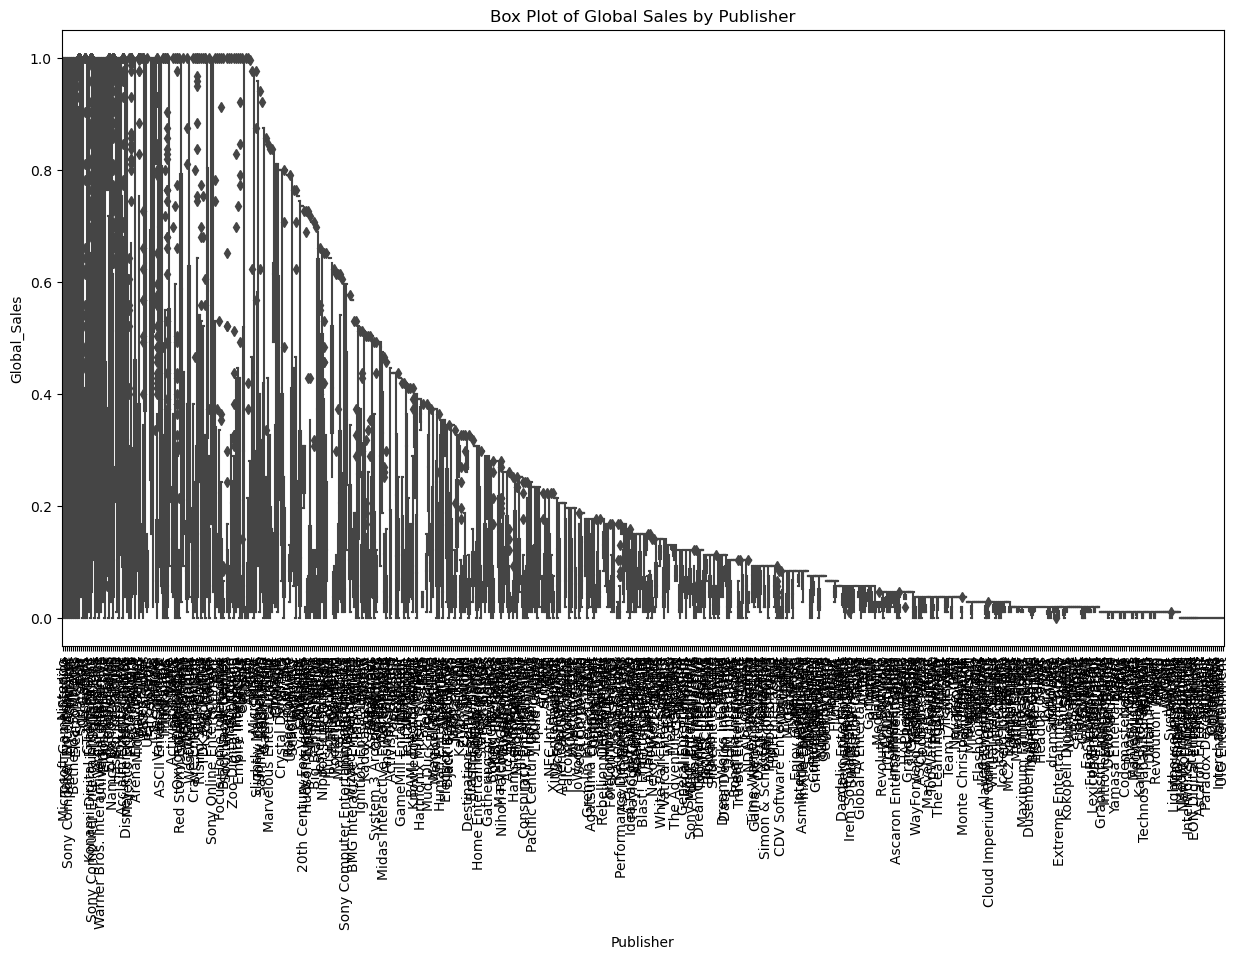

In [74]:
# To identify outliers and compare distributions of sales across different categories like 'Platform', 'Genre', and 'Publisher'.

for category in ['Platform', 'Genre', 'Publisher']:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x=category, y='Global_Sales', data=df)
    plt.title(f'Box Plot of Global Sales by {category}')
    plt.xticks(rotation=90)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

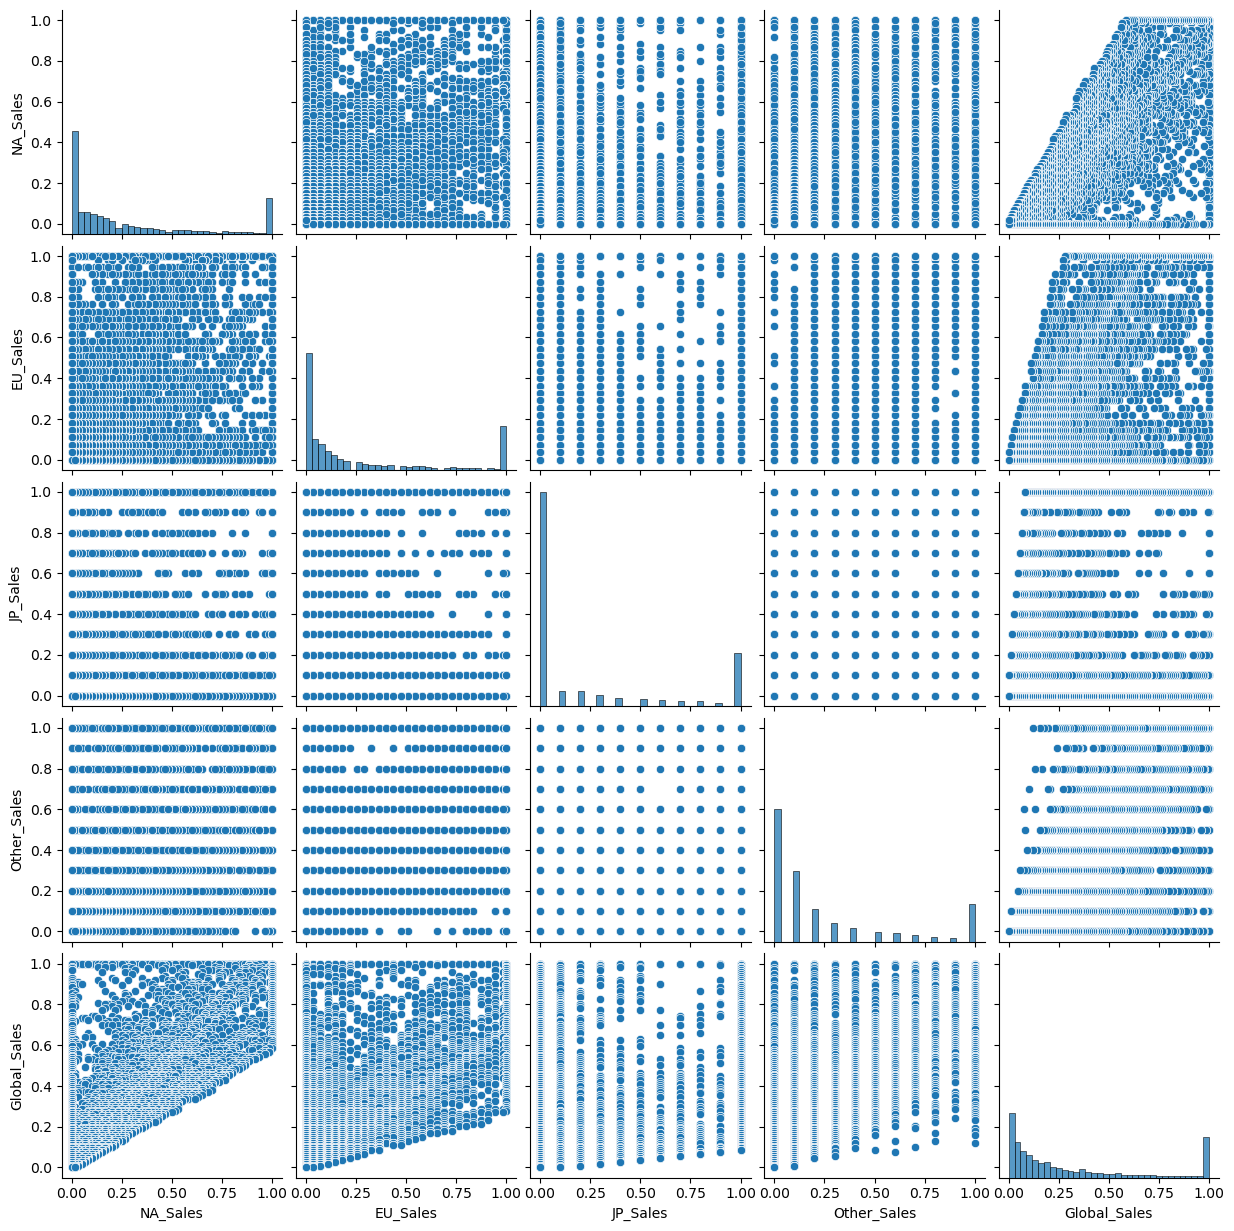

In [75]:
# To visualize pairwise relationships in the dataset, including correlations between different sales columns.

sns.pairplot(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

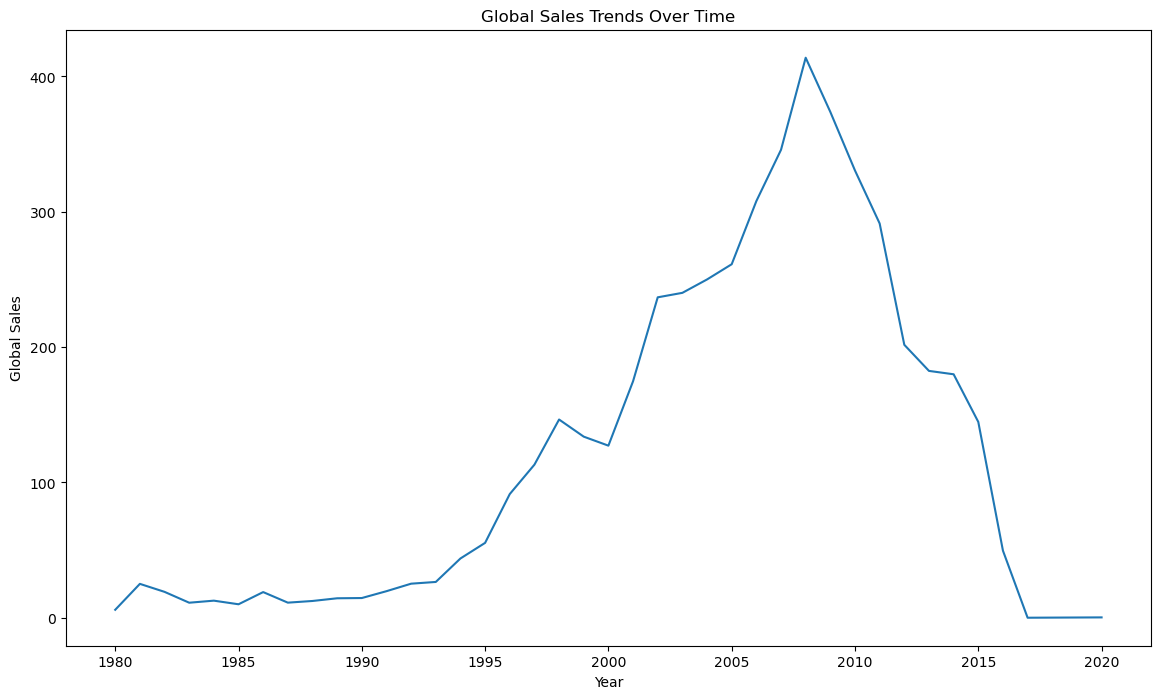

In [76]:
# Sales trends over time

plt.figure(figsize=(14, 8))
sns.lineplot(data=df.groupby('Year').sum().reset_index(), x='Year', y='Global_Sales')
plt.title('Global Sales Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

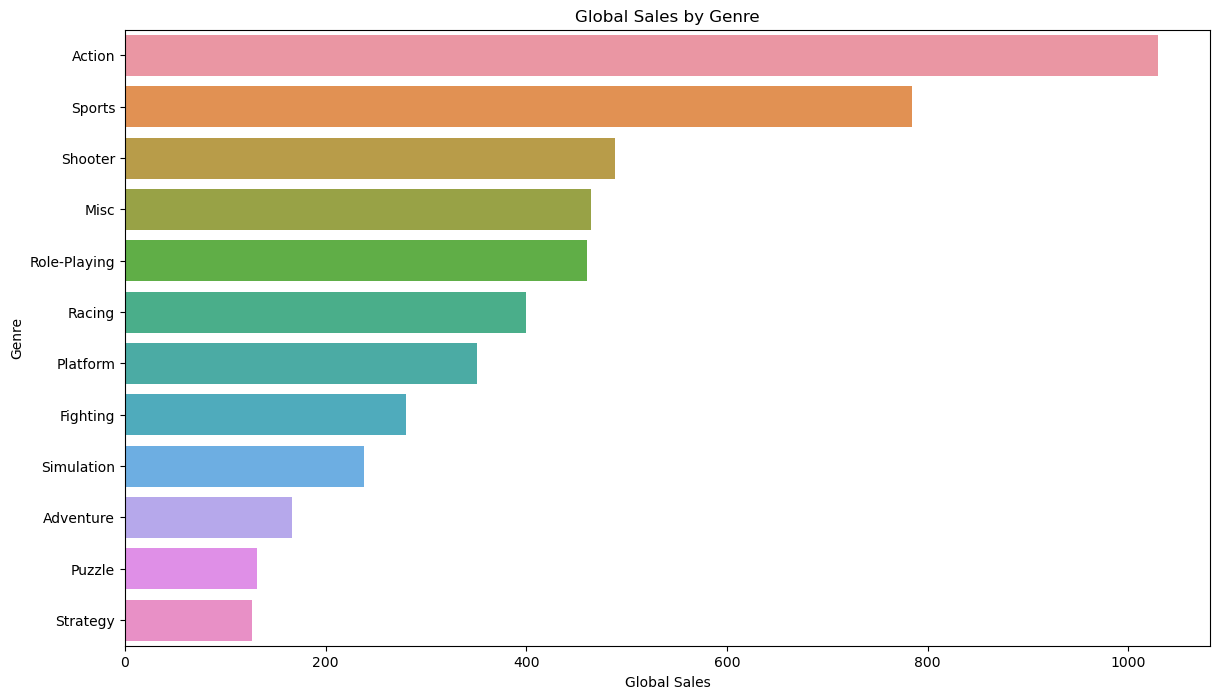

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

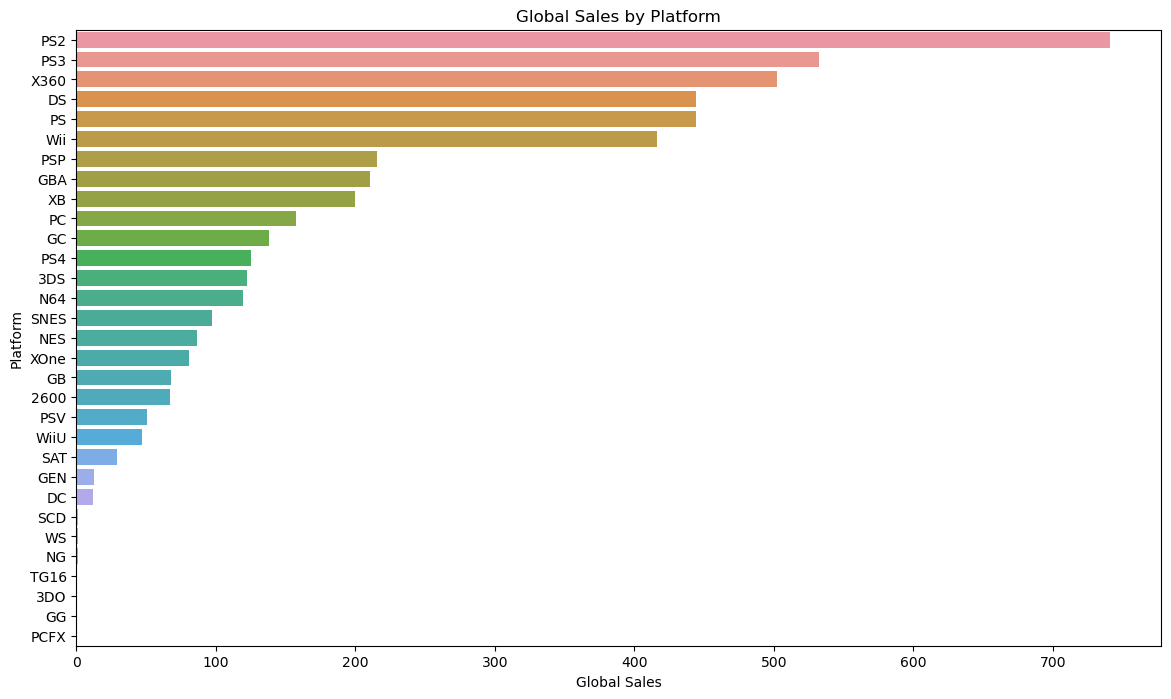

In [77]:
#  To understand which genres and platforms are most popular.

genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Global_Sales', y='Genre', data=genre_sales)
plt.title('Global Sales by Genre')
plt.xlabel('Global Sales')
plt.ylabel('Genre')
plt.show()

platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Global_Sales', y='Platform', data=platform_sales)
plt.title('Global Sales by Platform')
plt.xlabel('Global Sales')
plt.ylabel('Platform')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

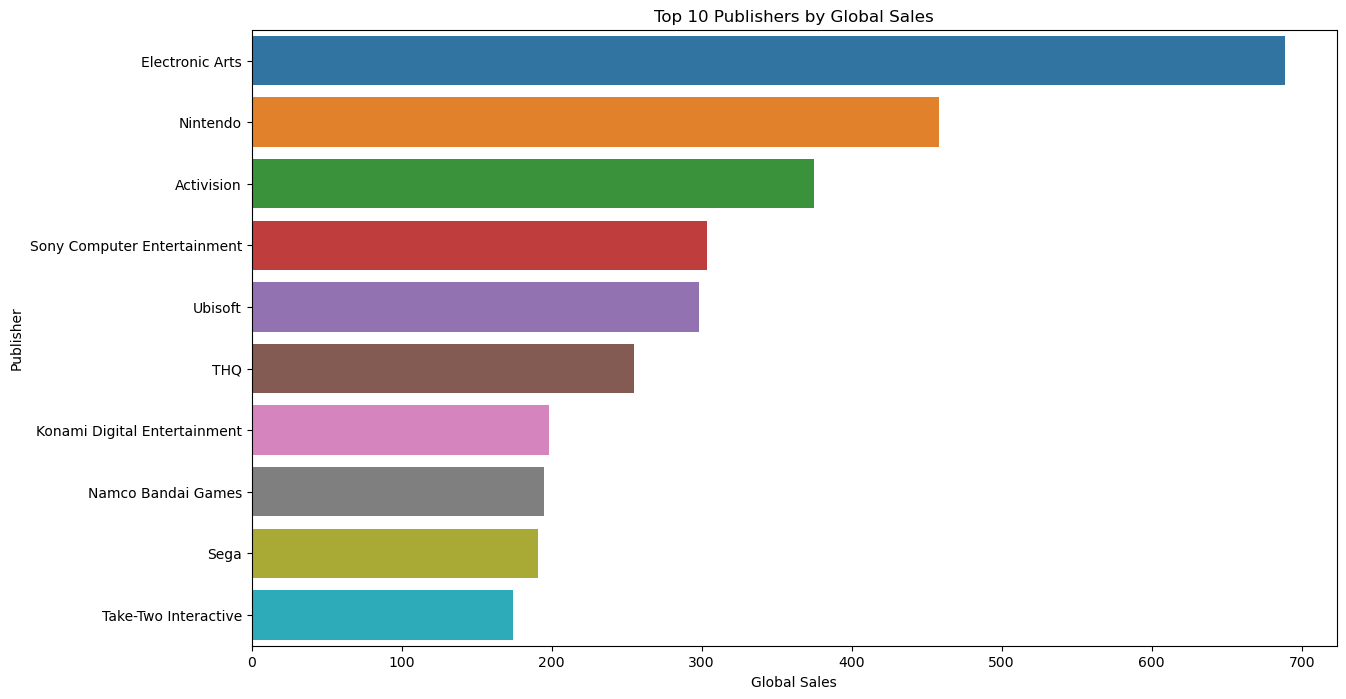

In [78]:
#  To identify the top publishers by sales.

top_publishers = df.groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x='Global_Sales', y='Publisher', data=top_publishers)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Publisher')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

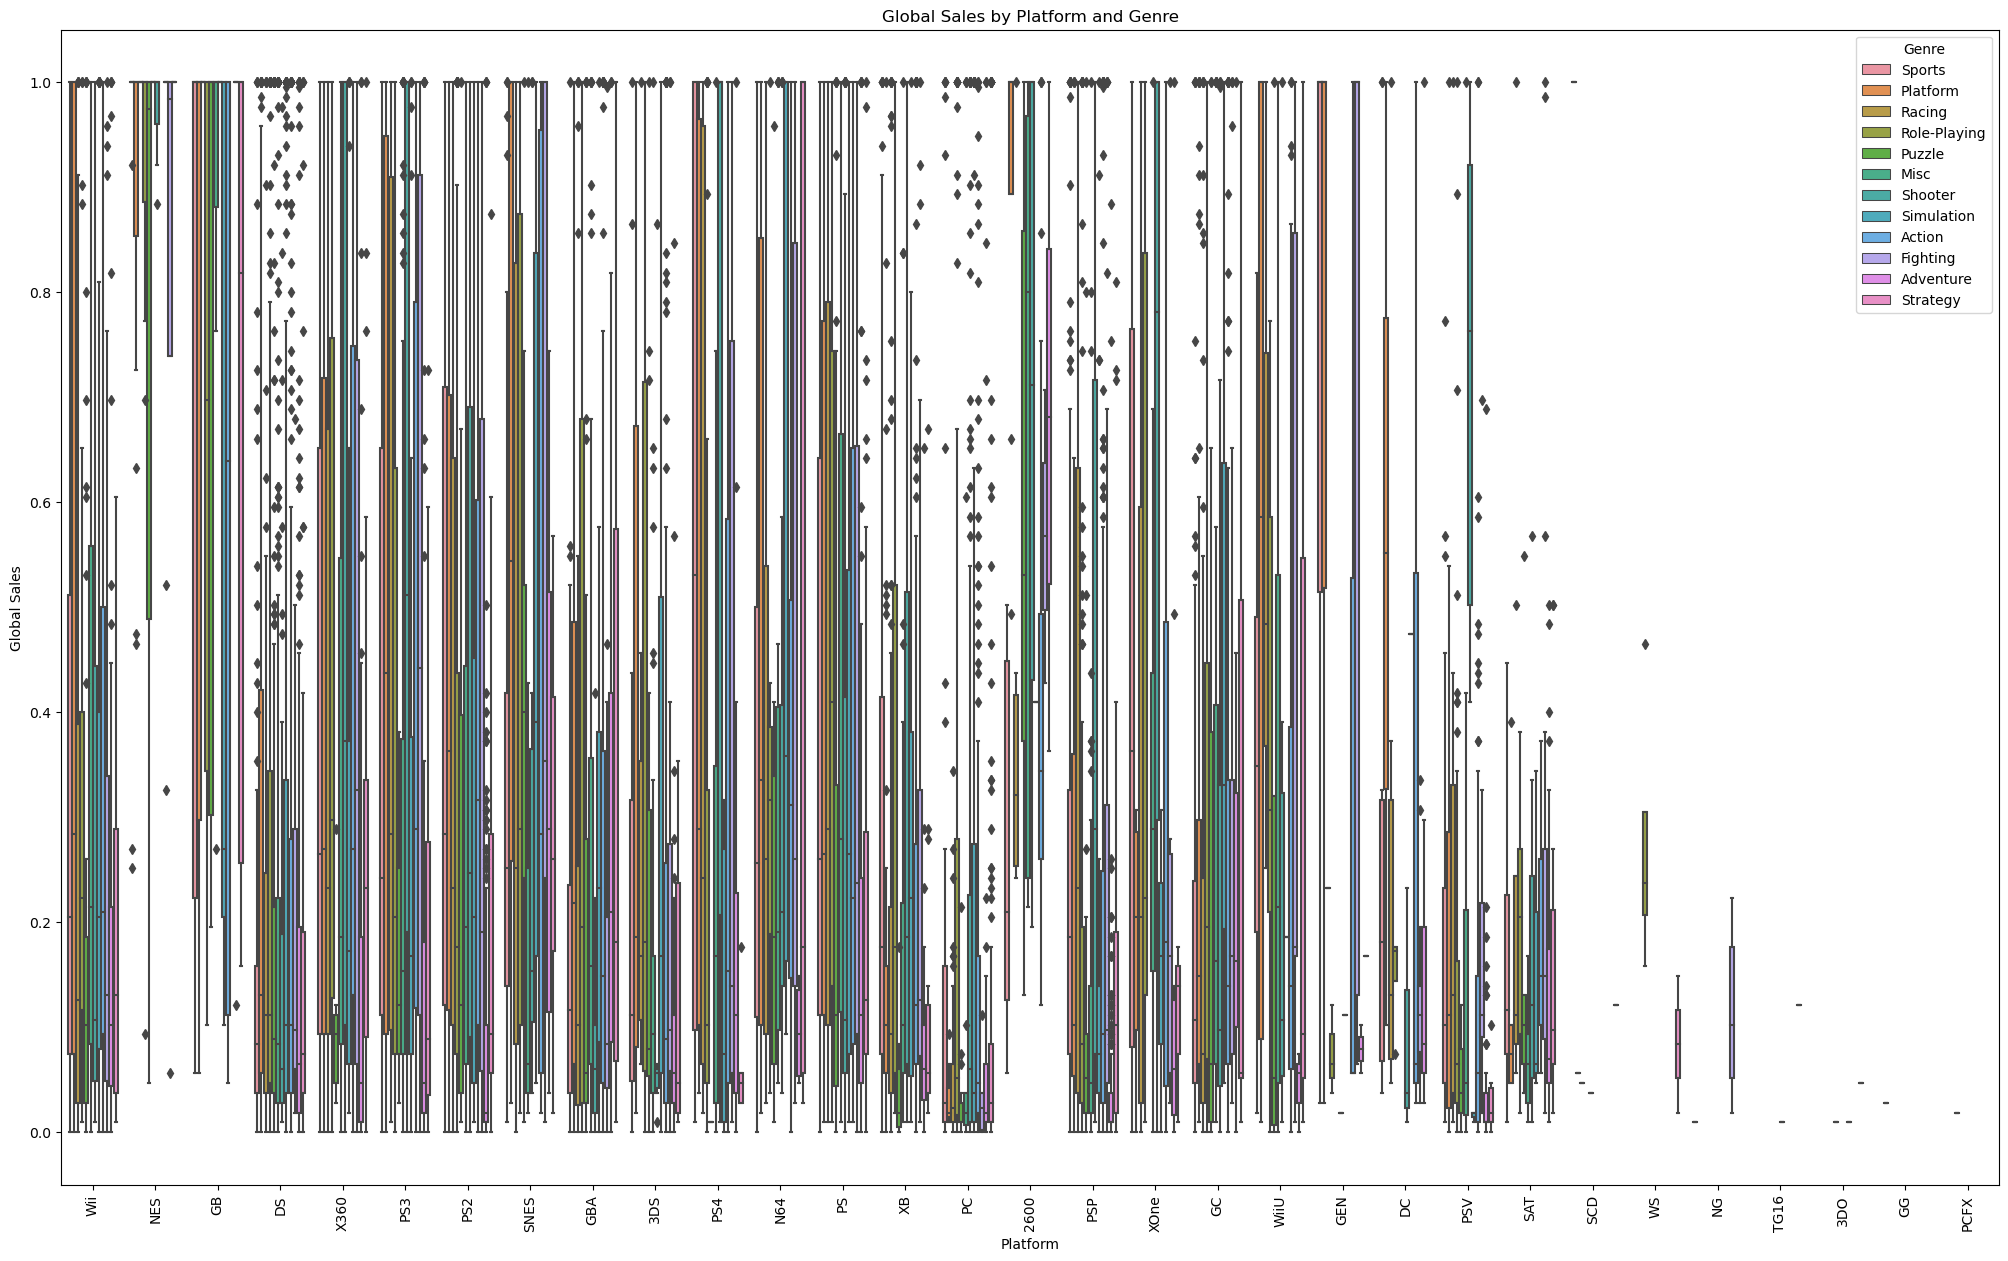

In [79]:
#  To see the interaction effect between platform and genre on sales.

plt.figure(figsize=(25, 15))
sns.boxplot(x='Platform', y='Global_Sales', hue='Genre', data=df)
plt.title('Global Sales by Platform and Genre')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=90)
plt.show()

In [80]:
# Encoding categorical variables/features

df = pd.get_dummies(df, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)

<IPython.core.display.Javascript object>

In [81]:
df['Total_Regional_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [82]:
print(df['Total_Regional_Sales'].head())

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: Total_Regional_Sales, dtype: float64


In [83]:
df.columns

Index(['Rank', 'Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'Platform_3DO', 'Platform_3DS',
       ...
       'Publisher_bitComposer Games', 'Publisher_dramatic create',
       'Publisher_fonfun', 'Publisher_iWin', 'Publisher_id Software',
       'Publisher_imageepoch Inc.', 'Publisher_inXile Entertainment',
       'Publisher_mixi, Inc', 'Publisher_responDESIGN',
       'Total_Regional_Sales'],
      dtype='object', length=627)

In [84]:
df = df.drop(columns=['Name'])

In [85]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Get relevant features
relevant_features = correlation_matrix['Global_Sales'].abs().sort_values(ascending=False).index.tolist()
relevant_features.remove('Global_Sales')
df = df[relevant_features + ['Global_Sales']]

print(df.head())

   Total_Regional_Sales  Rank  NA_Sales  Other_Sales  EU_Sales  JP_Sales  \
0                   4.0     1       1.0          1.0       1.0       1.0   
1                   4.0     2       1.0          1.0       1.0       1.0   
2                   4.0     3       1.0          1.0       1.0       1.0   
3                   4.0     4       1.0          1.0       1.0       1.0   
4                   4.0     5       1.0          1.0       1.0       1.0   

   Publisher_Nintendo  Publisher_Electronic Arts  Year  Genre_Adventure  ...  \
0                True                      False  2006            False  ...   
1                True                      False  1985            False  ...   
2                True                      False  2008            False  ...   
3                True                      False  2009            False  ...   
4                True                      False  1996            False  ...   

   Publisher_New  Publisher_Crystal Dynamics  Publisher_Joruda

In [86]:
df.head()

Total_Regional_Sales  Rank  NA_Sales  Other_Sales  EU_Sales  JP_Sales  \
0                   4.0     1       1.0          1.0       1.0       1.0   
1                   4.0     2       1.0          1.0       1.0       1.0   
2                   4.0     3       1.0          1.0       1.0       1.0   
3                   4.0     4       1.0          1.0       1.0       1.0   
4                   4.0     5       1.0          1.0       1.0       1.0   

   Publisher_Nintendo  Publisher_Electronic Arts  Year  Genre_Adventure  ...  \
0                True                      False  2006            False  ...   
1                True                      False  1985            False  ...   
2                True                      False  2008            False  ...   
3                True                      False  2009            False  ...   
4                True                      False  1996            False  ...   

   Publisher_New  Publisher_Crystal Dynamics  Publisher_Jorudan  \
0          False                       False              False   
1          False                       False              False   
2          False                       False              False   
3          False                       False              False   
4          False                       False              False   

   Publisher_Microprose  Publisher_CBS Electronics  \
0                 False                      False   
1                 False                      False   
2                 False                      False   
3                 False                      False   
4                 False                      False   

   Publisher_CokeM Interactive  Publisher_Elf  Publisher_ITT Family Games  \
0                        False          False                       False   
1                        False          False                       False   
2                        False          False                       False   
3                        False          False                       False   
4                        False          False                       False   

   Publisher_Starpath Corp.  Global_Sales  
0                     False           1.0  
1                     False           1.0  
2                     False           1.0  
3                     False           1.0  
4                     False           1.0  

[5 rows x 626 columns]

In [87]:


from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(df.drop(columns='Global_Sales'), df['Global_Sales'])
feature_importances = pd.Series(model.feature_importances_, index=df.drop(columns='Global_Sales').columns)
important_features = feature_importances.sort_values(ascending=False).index.tolist()
df = df[important_features[:10] + ['Global_Sales']]  # Select top 10 features

<IPython.core.display.Javascript object>

In [88]:
# splitting my dataset, preparing it for modelling

from sklearn.model_selection import train_test_split

X = df.drop(columns='Global_Sales')
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# importing libraries for modelling

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f'Linear Regression MSE: {lr_mse}')
print(f'Random Forest MSE: {rf_mse}')

Linear Regression MSE: 0.0077637233762054576
Random Forest MSE: 4.307271270045151e-07


In [90]:
from sklearn.metrics import r2_score, mean_absolute_error

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')

evaluate_model(lr_model, X_test, y_test)
evaluate_model(rf_model, X_test, y_test)

<IPython.core.display.Javascript object>

MSE: 0.0077637233762054576
RMSE: 0.08811199337323755
MAE: 0.059816129384045104
R²: 0.9279475907868007


<IPython.core.display.Javascript object>

MSE: 4.307271270045151e-07
RMSE: 0.0006562980473874009
MAE: 8.075091061946358e-05
R²: 0.9999960025717416


In [91]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

ridge_score = ridge_model.score(X_test, y_test)
lasso_score = lasso_model.score(X_test, y_test)

print(f'Ridge R^2: {ridge_score}')
print(f'Lasso R^2: {lasso_score}')

Ridge R^2: 0.9279438677756533
Lasso R^2: 0.8001366132517589


In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
evaluate_model(best_rf_model, X_test, y_test)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


<IPython.core.display.Javascript object>

MSE: 4.777796431806199e-05
RMSE: 0.006912160611419702
MAE: 0.002586312692631003
R²: 0.9995565893747619
